### **Group Project (Team A13): Loan Default Prediction**

**Introduction**

NBFI Vehicle Loan repayment Dataset

Kaggle Link:
https://www.kaggle.com/datasets/meastanmay/nbfi-vehicle-loan-repayment-dataset/data

About Dataset:

A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a type of financial institution that is not authorized to operate as a bank or is not under the supervision of a banking regulatory agency at the national or international level. NBFCs provide financial services similar to those of banks, such as investment, risk pooling, contractual savings, and market brokering.

An NBFC is currently facing profitability issues due to an increase in defaults in the vehicle loan category. The company aims to assess the loan repayment ability of clients and determine the relative importance of each factor contributing to a borrower's ability to repay the loan.

The objective is to predict whether a client is likely to default on their vehicle loan payment or not. The task involves building a model using the Train_Dataset and testing the model on the Test_Dataset. The predictions for each ID in the Test_Dataset are to be submitted to the Hackathon platform.

Import instructions on Kaggle:

import kagglehub

Download latest version

path = kagglehub.dataset_download("meastanmay/nbfi-vehicle-loan-repayment-dataset")

print("Path to dataset files:", path)

**Modules**

In [94]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier

import statsmodels.api as sm

import seaborn as sns

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

from imblearn.over_sampling import SMOTE

**Data**

In [2]:
# Import raw data
df = pd.read_csv("C:/MyFolder/UCI/MSBA/Term2/ML/Final Project/Data/Train_Dataset.csv")
#test_df = pd.read_csv("C:/MyFolder/UCI/MSBA/Term2/ML/Final Project/Data/Test_Dataset.csv")

C:\Users\nares\AppData\Local\Temp\ipykernel_49068\1658407833.py:2: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/MyFolder/UCI/MSBA/Term2/ML/Final Project/Data/Train_Dataset.csv")


In [3]:
# DataFrame shape
print("Original Size, Rows: %d, Columns: %d" % (df.shape[0], df.shape[1]))
#print("Original TEST size, Rows: %d, Columns: %d" % (test_df.shape[0], test_df.shape[1]))

Original Size, Rows: 121856, Columns: 40


In [4]:
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [5]:
df.dtypes

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

Convert object type attribues to numeric.

In [6]:
df['Client_Income'] = pd.to_numeric(df['Client_Income'], errors='coerce')
df['Credit_Amount'] = pd.to_numeric(df['Credit_Amount'], errors='coerce')
df['Loan_Annuity'] = pd.to_numeric(df['Loan_Annuity'], errors='coerce')
df['Population_Region_Relative'] = pd.to_numeric(df['Population_Region_Relative'], errors='coerce')
df['Age_Days'] = pd.to_numeric(df['Age_Days'], errors='coerce')
df['Employed_Days'] = pd.to_numeric(df['Employed_Days'], errors='coerce')
df['Registration_Days'] = pd.to_numeric(df['Registration_Days'], errors='coerce')
df['ID_Days'] = pd.to_numeric(df['ID_Days'], errors='coerce')
df['Score_Source_3'] = pd.to_numeric(df['Score_Source_3'], errors='coerce')

In [7]:
total_obs = df.shape[0]
null_dist = pd.DataFrame({"null_count": df.isnull().sum(), "null_pcnt":df.isnull().sum()*100/total_obs})
print(null_dist)
del total_obs, null_dist

                            null_count  null_pcnt
ID                                   0   0.000000
Client_Income                     3622   2.972361
Car_Owned                         3581   2.938715
Bike_Owned                        3624   2.974002
Active_Loan                       3635   2.983029
House_Own                         3661   3.004366
Child_Count                       3638   2.985491
Credit_Amount                     3637   2.984670
Loan_Annuity                      4826   3.960412
Accompany_Client                  1746   1.432839
Client_Income_Type                3701   3.037191
Client_Education                  3645   2.991236
Client_Marital_Status             3473   2.850085
Client_Gender                     2413   1.980206
Loan_Contract_Type                3651   2.996159
Client_Housing_Type               3687   3.025702
Population_Region_Relative        4868   3.994879
Age_Days                          3617   2.968258
Employed_Days                     3666   3.008469


Attributes with highest nulls: Own_House_Age, Client_Occupation, Score_Source_1, Score_Source_3, Social_Circle_Default.

In [8]:
#move the null attributes to a seperate file 
df_null_attr = df[['Own_House_Age', 'Client_Occupation', 'Score_Source_1', 'Score_Source_3', 'Social_Circle_Default']]
df = df.drop(['Own_House_Age', 'Client_Occupation', 'Score_Source_1', 'Score_Source_3', 'Social_Circle_Default'], axis = 1)

In [9]:
df.describe()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,...,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_2,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,1.182340e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,118219.000000,117030.000000,116988.000000,...,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,116170.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,1.686519e+04,0.342854,0.332262,0.499175,0.692060,0.417779,60046.488951,2721.254492,0.022602,...,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.518625,962.106056,1.891082,0.080792
std,3.517694e+04,1.153815e+04,0.474665,0.471026,0.500001,0.461644,0.728802,40350.663346,1461.466162,0.413617,...,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.740248,827.976726,1.861921,0.272517
min,1.210000e+07,2.565000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4500.000000,217.350000,0.000533,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000
25%,1.213046e+07,1.125000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,27000.000000,1657.350000,0.010006,...,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.390164,272.000000,0.000000,0.000000
50%,1.216093e+07,1.440000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,51750.000000,2499.750000,0.018850,...,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.564978,755.000000,1.000000,0.000000
75%,1.219139e+07,2.025000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,80865.000000,3466.800000,0.028663,...,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.664011,1570.000000,3.000000,0.000000
max,1.222186e+07,1.800009e+06,1.000000,1.000000,1.000000,1.000000,19.000000,405000.000000,22500.000000,100.000000,...,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,100.000000,4185.000000,22.000000,1.000000


**Preserve this pre-clean data for benchmark analysis**

In [10]:
df_bench = df

### **Stage 2 (Models - Presented in class)**

**Outliers**

Treat numerical continuous attributes

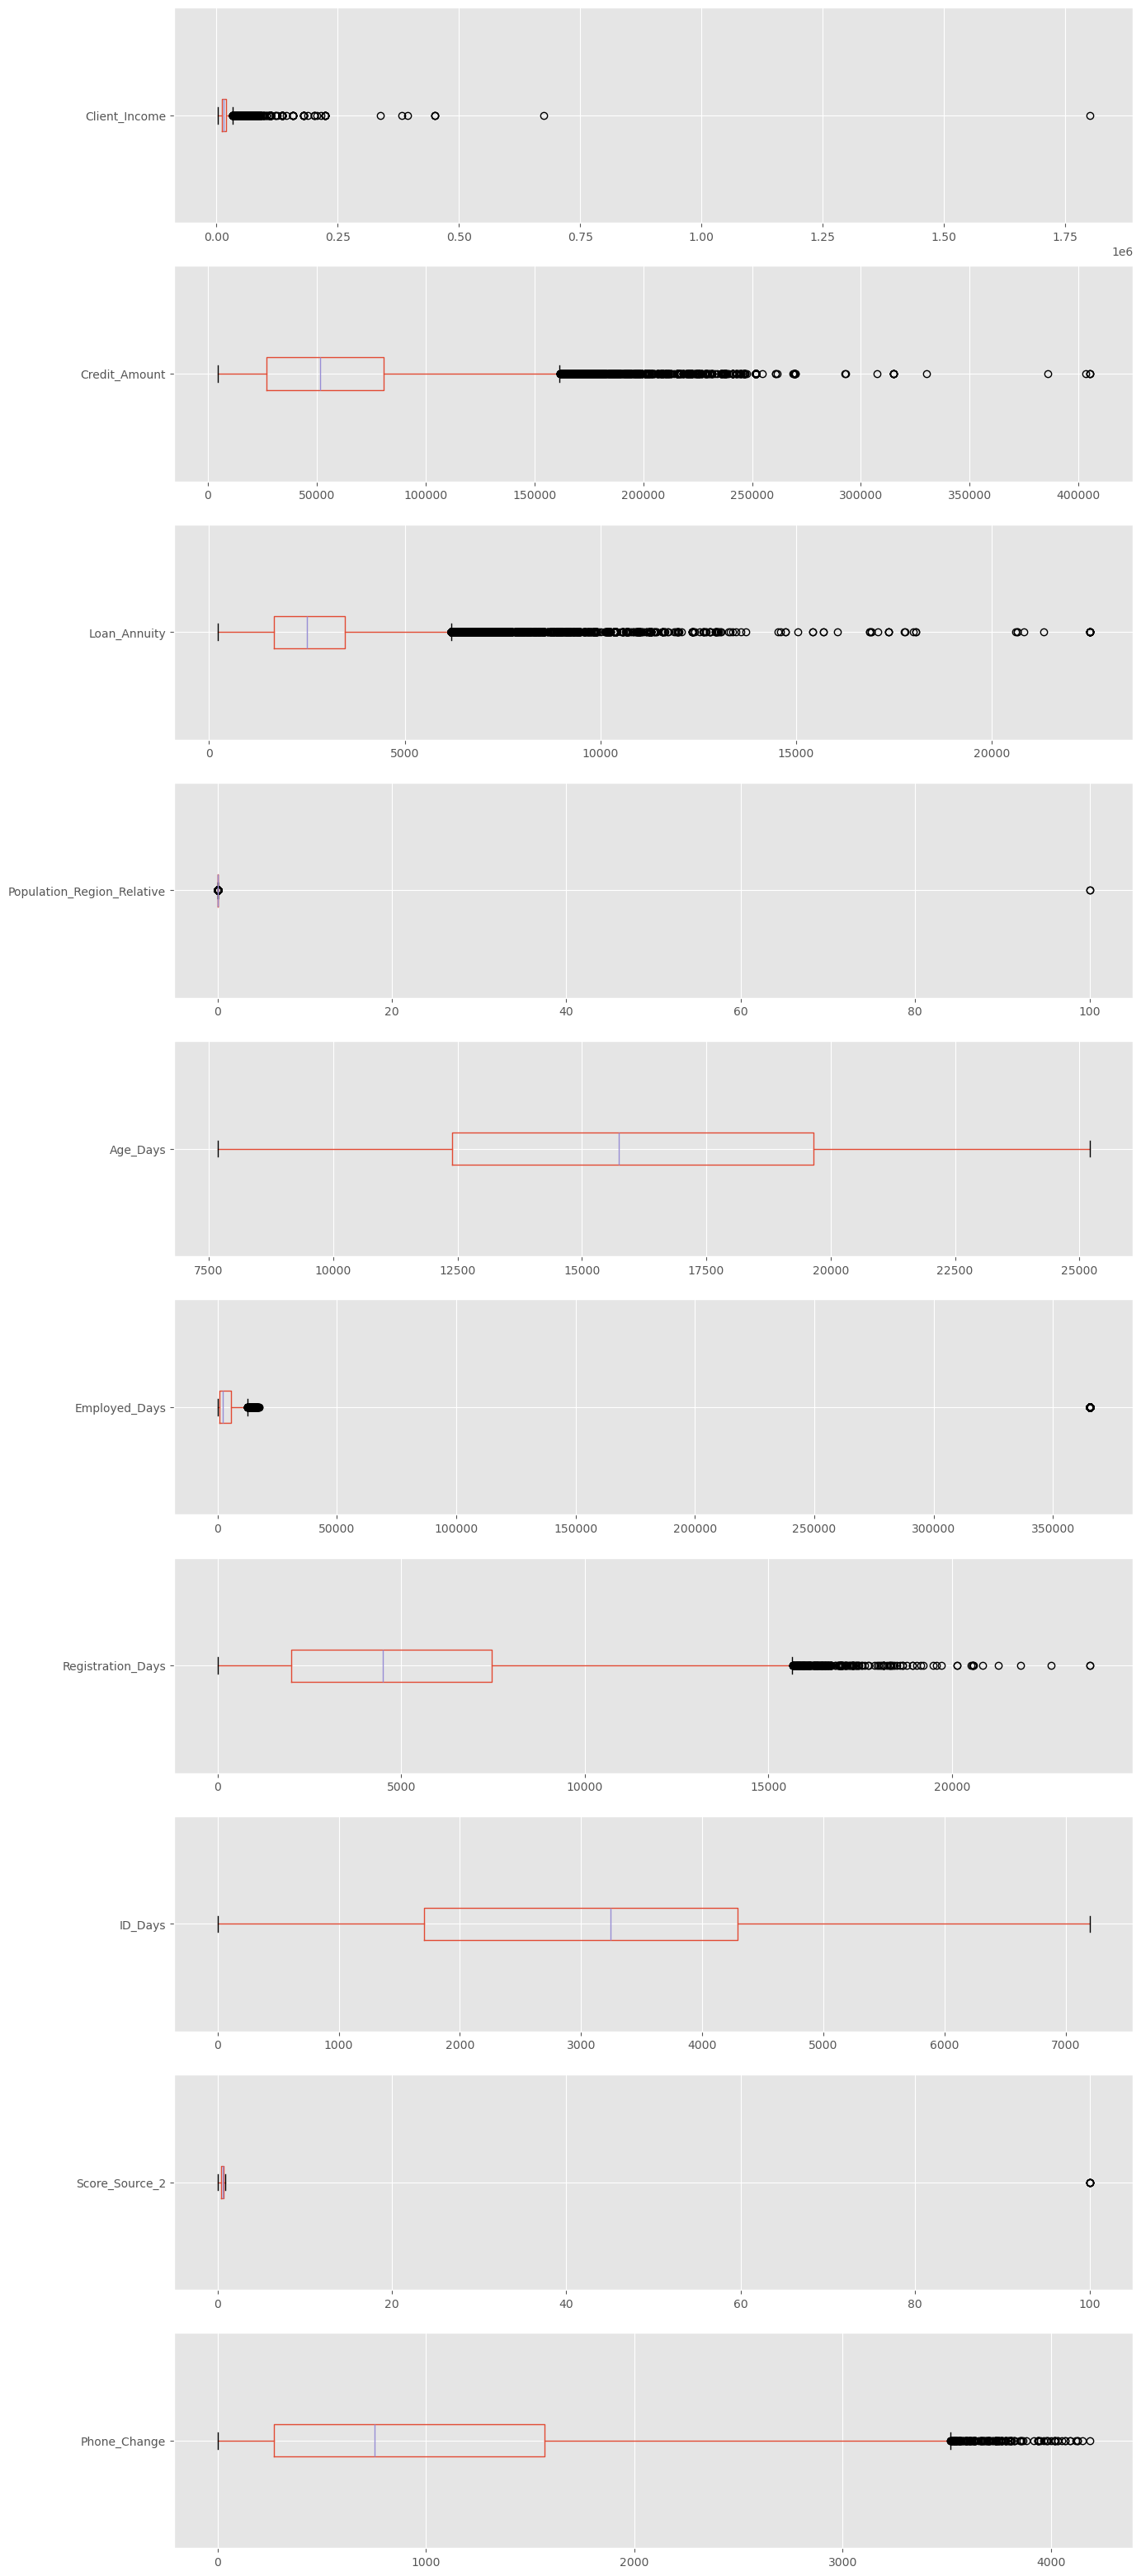

In [11]:
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(15, 40))

df.boxplot(['Client_Income'], vert=False, ax=axes[0])
df.boxplot(['Credit_Amount'], vert=False, ax=axes[1])
df.boxplot(['Loan_Annuity'], vert=False, ax=axes[2])
df.boxplot(['Population_Region_Relative'], vert=False, ax=axes[3])
df.boxplot(['Age_Days'], vert=False, ax=axes[4])
df.boxplot(['Employed_Days'], vert=False, ax=axes[5])
df.boxplot(['Registration_Days'], vert=False, ax=axes[6])
df.boxplot(['ID_Days'], vert=False, ax=axes[7])
df.boxplot(['Score_Source_2'], vert=False, ax=axes[8])
df.boxplot(['Phone_Change'], vert=False, ax=axes[9])

plt.show()

In [12]:
# DataFrame shape
print("Current Size, Rows: %d, Columns: %d" % (df.shape[0], df.shape[1]))
#print("Original TEST size, Rows: %d, Columns: %d" % (test_df.shape[0], test_df.shape[1]))

Current Size, Rows: 121856, Columns: 35


In [13]:
print("95p:",df['Client_Income'].quantile(0.95))
print("96p:",df['Client_Income'].quantile(0.96))
print("97p:",df['Client_Income'].quantile(0.97))
print("98p:",df['Client_Income'].quantile(0.98))
print("99p:",df['Client_Income'].quantile(0.99))

95p: 33750.0
96p: 36000.0
97p: 38250.0
98p: 42750.0
99p: 48150.0


In [14]:
#not trimming down the upper tail to save the data; instead putting hard cut-off at 99p 
df['Client_Income'] = df['Client_Income'].apply(lambda x: 48150.0 if x > 48150.0 else x)

In [15]:
'''
Q1 = df['Client_Income'].quantile(0.25) #compute lower quantile
Q3 = df['Client_Income'].quantile(0.75) #compute higher quantile
IQR = Q3 - Q1 #Calculate quantile range
IQR_lower = Q1 - 1.5 * IQR
IQR_upper = Q3 + 1.5 * IQR
df = df[df['Client_Income'] <= IQR_upper]
del Q1, Q3, IQR, IQR_lower, IQR_upper
'''

"\nQ1 = df['Client_Income'].quantile(0.25) #compute lower quantile\nQ3 = df['Client_Income'].quantile(0.75) #compute higher quantile\nIQR = Q3 - Q1 #Calculate quantile range\nIQR_lower = Q1 - 1.5 * IQR\nIQR_upper = Q3 + 1.5 * IQR\ndf = df[df['Client_Income'] <= IQR_upper]\ndel Q1, Q3, IQR, IQR_lower, IQR_upper\n"

In [16]:
df['Client_Income']=df['Client_Income'].fillna(df['Client_Income'].median())

In [17]:
print("95p:",df['Credit_Amount'].quantile(0.95))
print("96p:",df['Credit_Amount'].quantile(0.96))
print("97p:",df['Credit_Amount'].quantile(0.97))
print("98p:",df['Credit_Amount'].quantile(0.98))
print("99p:",df['Credit_Amount'].quantile(0.99))

95p: 135000.0
96p: 144835.52399999992
97p: 154602.0
98p: 166674.6
99p: 187067.7


In [18]:
#not trimming down the upper tail to save the data; instead putting hard cut-off at 99p 
df['Credit_Amount'] = df['Credit_Amount'].apply(lambda x: 187067 if x > 187067 else x)

In [19]:
df['Credit_Amount']=df['Credit_Amount'].fillna(df['Credit_Amount'].median())

In [20]:
df['Loan_Annuity']=df['Loan_Annuity'].fillna(df['Loan_Annuity'].median())

In [21]:
#not trimming down the upper tail to save the data; instead putting hard cut-off at $6000 
df['Loan_Annuity'] = df['Loan_Annuity'].apply(lambda x: 6000 if x > 6000 else x)

In [22]:
df['Population_Region_Relative']=df['Population_Region_Relative'].fillna(df['Population_Region_Relative'].median())

In [23]:
df = df[df['Population_Region_Relative'] <= 0.1]

In [24]:
pd.set_option('mode.chained_assignment', None) #turning off some warnings

In [25]:
#not trimming down the upper tail to save the data; instead putting hard cut-off at 17 years 
df['Employed_Days'] = df['Employed_Days'].apply(lambda x: 6205 if x > 6205 else x)

In [26]:
#not trimming down the upper tail to save the data; instead putting hard cut-off at 41 years 
df['Registration_Days'] = df['Registration_Days'].apply(lambda x: 14965 if x > 14965 else x)

In [27]:
df['Score_Source_2']=df['Score_Source_2'].fillna(df['Score_Source_2'].median())

In [28]:
df = df[(df['Score_Source_2'] >= 0) & (df['Score_Source_2'] <= 1.0)]

In [29]:
df['Phone_Change']=df['Phone_Change'].fillna(df['Phone_Change'].median())

In [30]:
#not trimming down the upper tail to save the data; instead putting hard cut-off at 10 years 
df['Phone_Change'] = df['Phone_Change'].apply(lambda x: 3650 if x > 3650 else x)

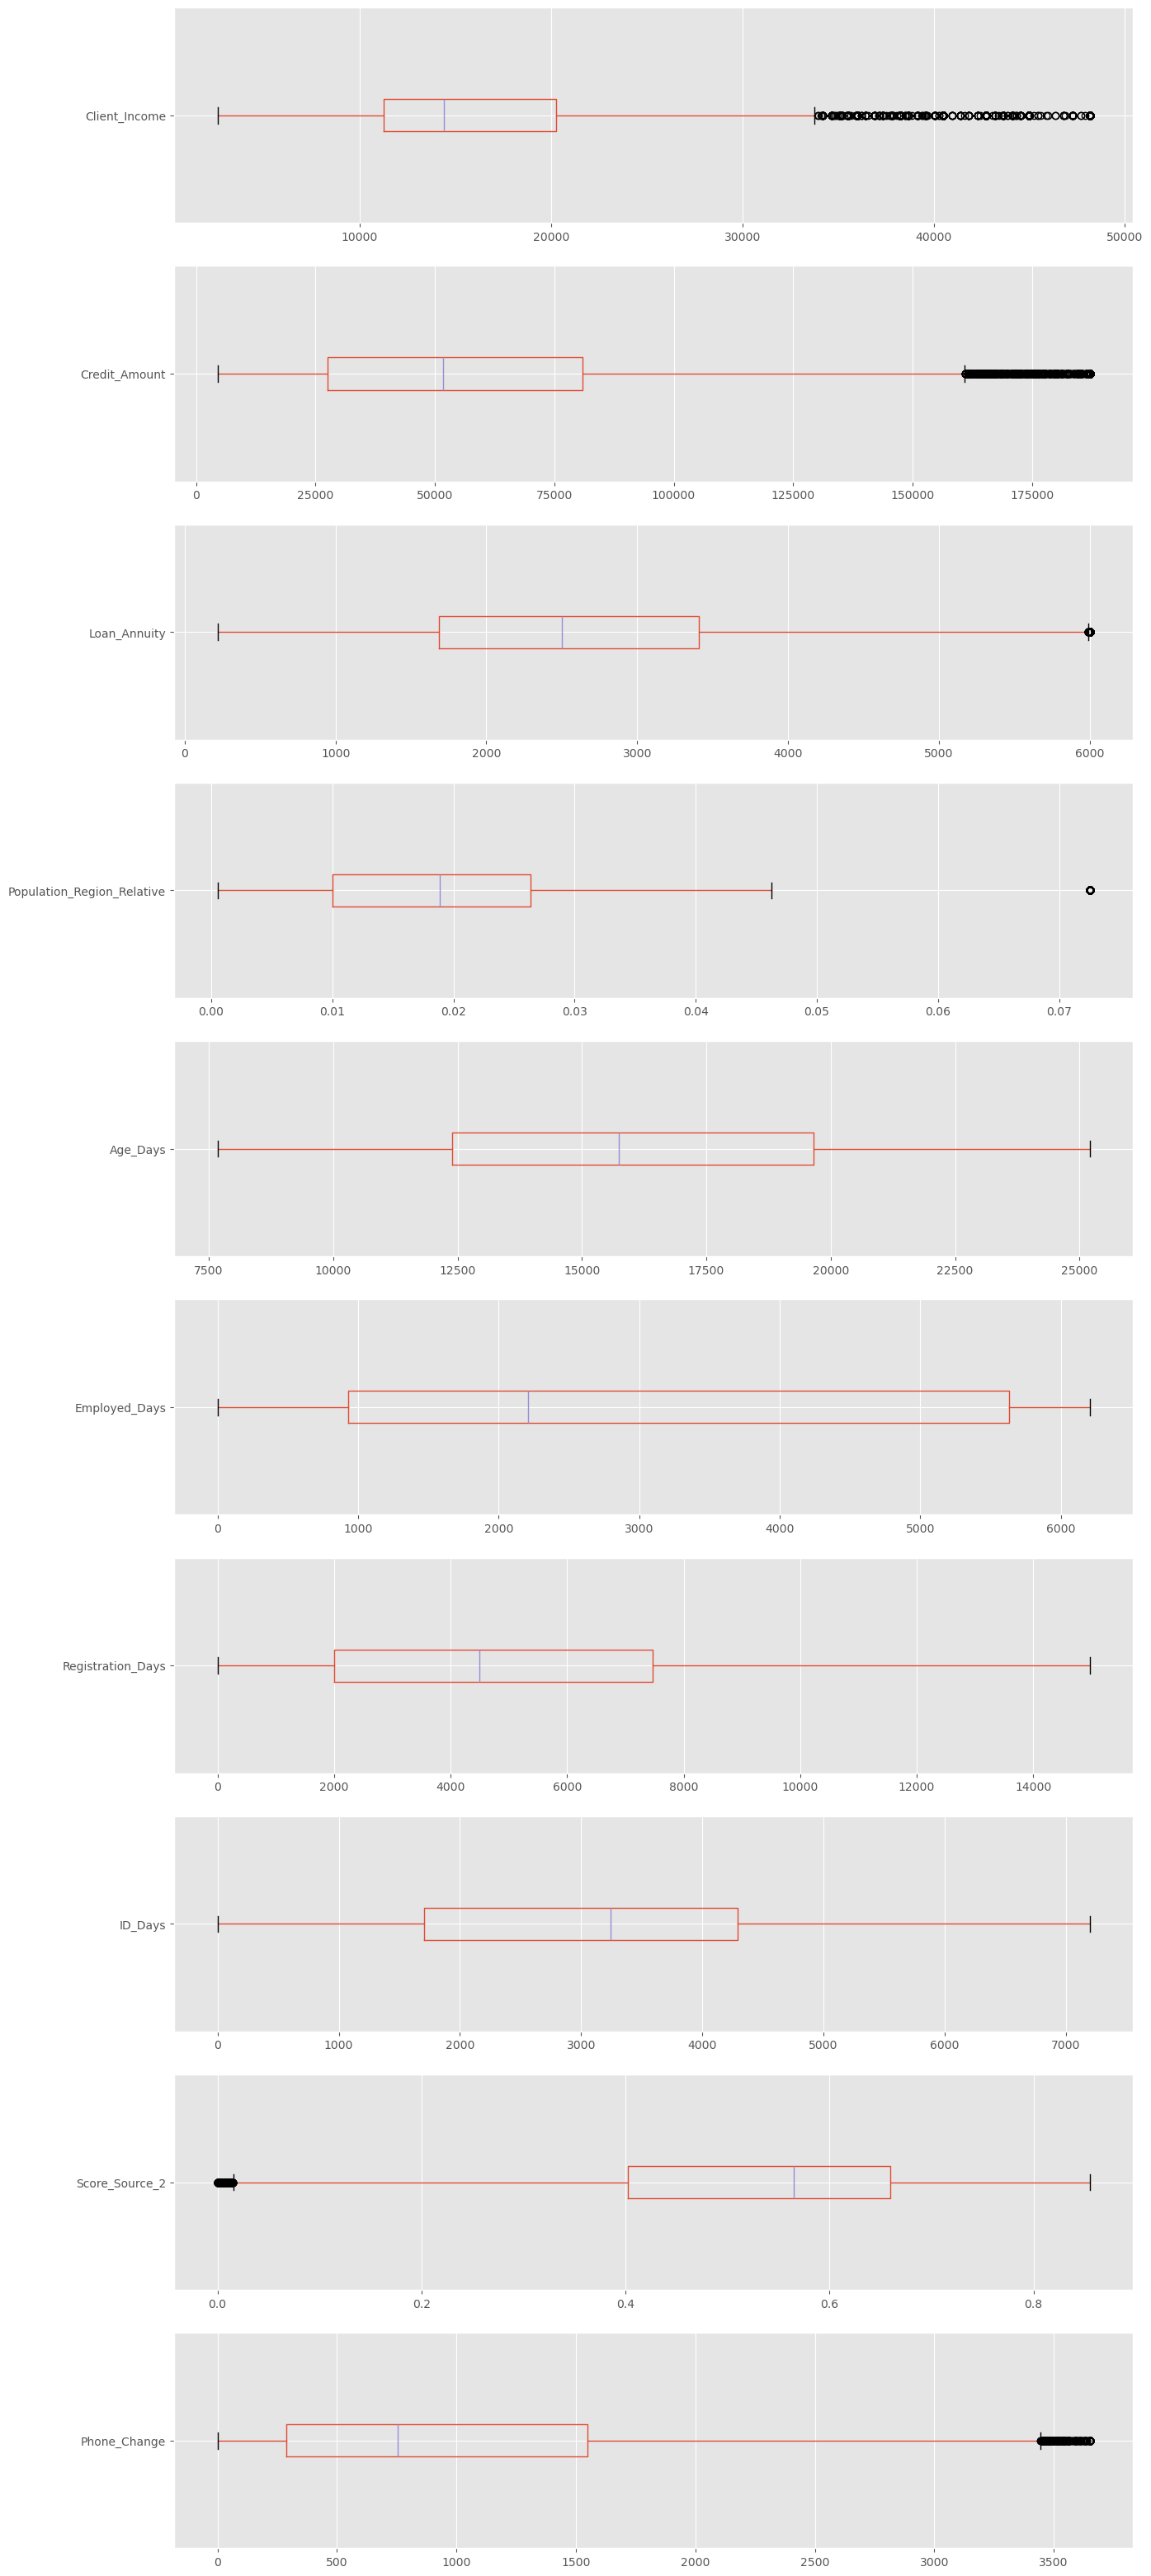

In [31]:
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(15, 40))

df.boxplot(['Client_Income'], vert=False, ax=axes[0])
df.boxplot(['Credit_Amount'], vert=False, ax=axes[1])
df.boxplot(['Loan_Annuity'], vert=False, ax=axes[2])
df.boxplot(['Population_Region_Relative'], vert=False, ax=axes[3])
df.boxplot(['Age_Days'], vert=False, ax=axes[4])
df.boxplot(['Employed_Days'], vert=False, ax=axes[5])
df.boxplot(['Registration_Days'], vert=False, ax=axes[6])
df.boxplot(['ID_Days'], vert=False, ax=axes[7])
df.boxplot(['Score_Source_2'], vert=False, ax=axes[8])
df.boxplot(['Phone_Change'], vert=False, ax=axes[9])

plt.show()

In [32]:
null_counts = df[['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative',
                  'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 
                  'Score_Source_2', 'Phone_Change']].isnull().sum()
print(null_counts)

Client_Income                    0
Credit_Amount                    0
Loan_Annuity                     0
Population_Region_Relative       0
Age_Days                      3616
Employed_Days                 3666
Registration_Days             3631
ID_Days                       5985
Score_Source_2                   0
Phone_Change                     0
dtype: int64


In [33]:
#impute the missing values with median
df['Age_Days']=df['Age_Days'].fillna(df['Age_Days'].median())
df['Employed_Days']=df['Employed_Days'].fillna(df['Employed_Days'].median())
df['Registration_Days']=df['Registration_Days'].fillna(df['Registration_Days'].median())
df['ID_Days']=df['ID_Days'].fillna(df['ID_Days'].median())

In [34]:
print("Current Size, Rows: %d, Columns: %d" % (df.shape[0], df.shape[1]))

Current Size, Rows: 121848, Columns: 35


Treat categorical attributes

In [35]:
null_counts = df[['Default', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count',
                  'Accompany_Client', 'Client_Income_Type', 'Client_Education', 
                  'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
                  'Client_Housing_Type', 'Mobile_Tag', 'Homephone_Tag',
                  'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating',
                  'Application_Process_Day', 'Application_Process_Hour', 'Client_Permanent_Match_Tag',
                  'Client_Contact_Work_Tag', 'Type_Organization', 'Credit_Bureau']].isnull().sum()
print(null_counts)

Default                           0
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3659
Child_Count                    3638
Accompany_Client               1745
Client_Income_Type             3700
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Family_Members          2409
Cleint_City_Rating             2409
Application_Process_Day        2428
Application_Process_Hour       3663
Client_Permanent_Match_Tag        0
Client_Contact_Work_Tag           0
Type_Organization              3609
Credit_Bureau                 18539
dtype: int64


In [36]:
#impute nulls with mode
df['Car_Owned']=df['Car_Owned'].fillna(df['Car_Owned'].mode()[0])
df['Bike_Owned']=df['Bike_Owned'].fillna(df['Bike_Owned'].mode()[0])
df['Active_Loan']=df['Active_Loan'].fillna(df['Active_Loan'].mode()[0])
df['House_Own']=df['House_Own'].fillna(df['House_Own'].mode()[0])
df['Child_Count']=df['Child_Count'].fillna(df['Child_Count'].mode()[0])
df['Accompany_Client']=df['Accompany_Client'].fillna(df['Accompany_Client'].mode()[0])
df['Client_Income_Type']=df['Client_Income_Type'].fillna(df['Client_Income_Type'].mode()[0])
df['Client_Education']=df['Client_Education'].fillna(df['Client_Education'].mode()[0])
df['Client_Marital_Status']=df['Client_Marital_Status'].fillna(df['Client_Marital_Status'].mode()[0])
df['Client_Gender']=df['Client_Gender'].fillna(df['Client_Gender'].mode()[0])
df['Loan_Contract_Type']=df['Loan_Contract_Type'].fillna(df['Loan_Contract_Type'].mode()[0])
df['Client_Housing_Type']=df['Client_Housing_Type'].fillna(df['Client_Housing_Type'].mode()[0])
df['Client_Family_Members']=df['Client_Family_Members'].fillna(df['Client_Family_Members'].mode()[0])
df['Cleint_City_Rating']=df['Cleint_City_Rating'].fillna(df['Cleint_City_Rating'].mode()[0])
df['Application_Process_Day']=df['Application_Process_Day'].fillna(df['Application_Process_Day'].mode()[0])
df['Application_Process_Hour']=df['Application_Process_Hour'].fillna(df['Application_Process_Hour'].mode()[0])
df['Type_Organization']=df['Type_Organization'].fillna(df['Type_Organization'].mode()[0])
df['Credit_Bureau']=df['Credit_Bureau'].fillna(df['Credit_Bureau'].mode()[0])

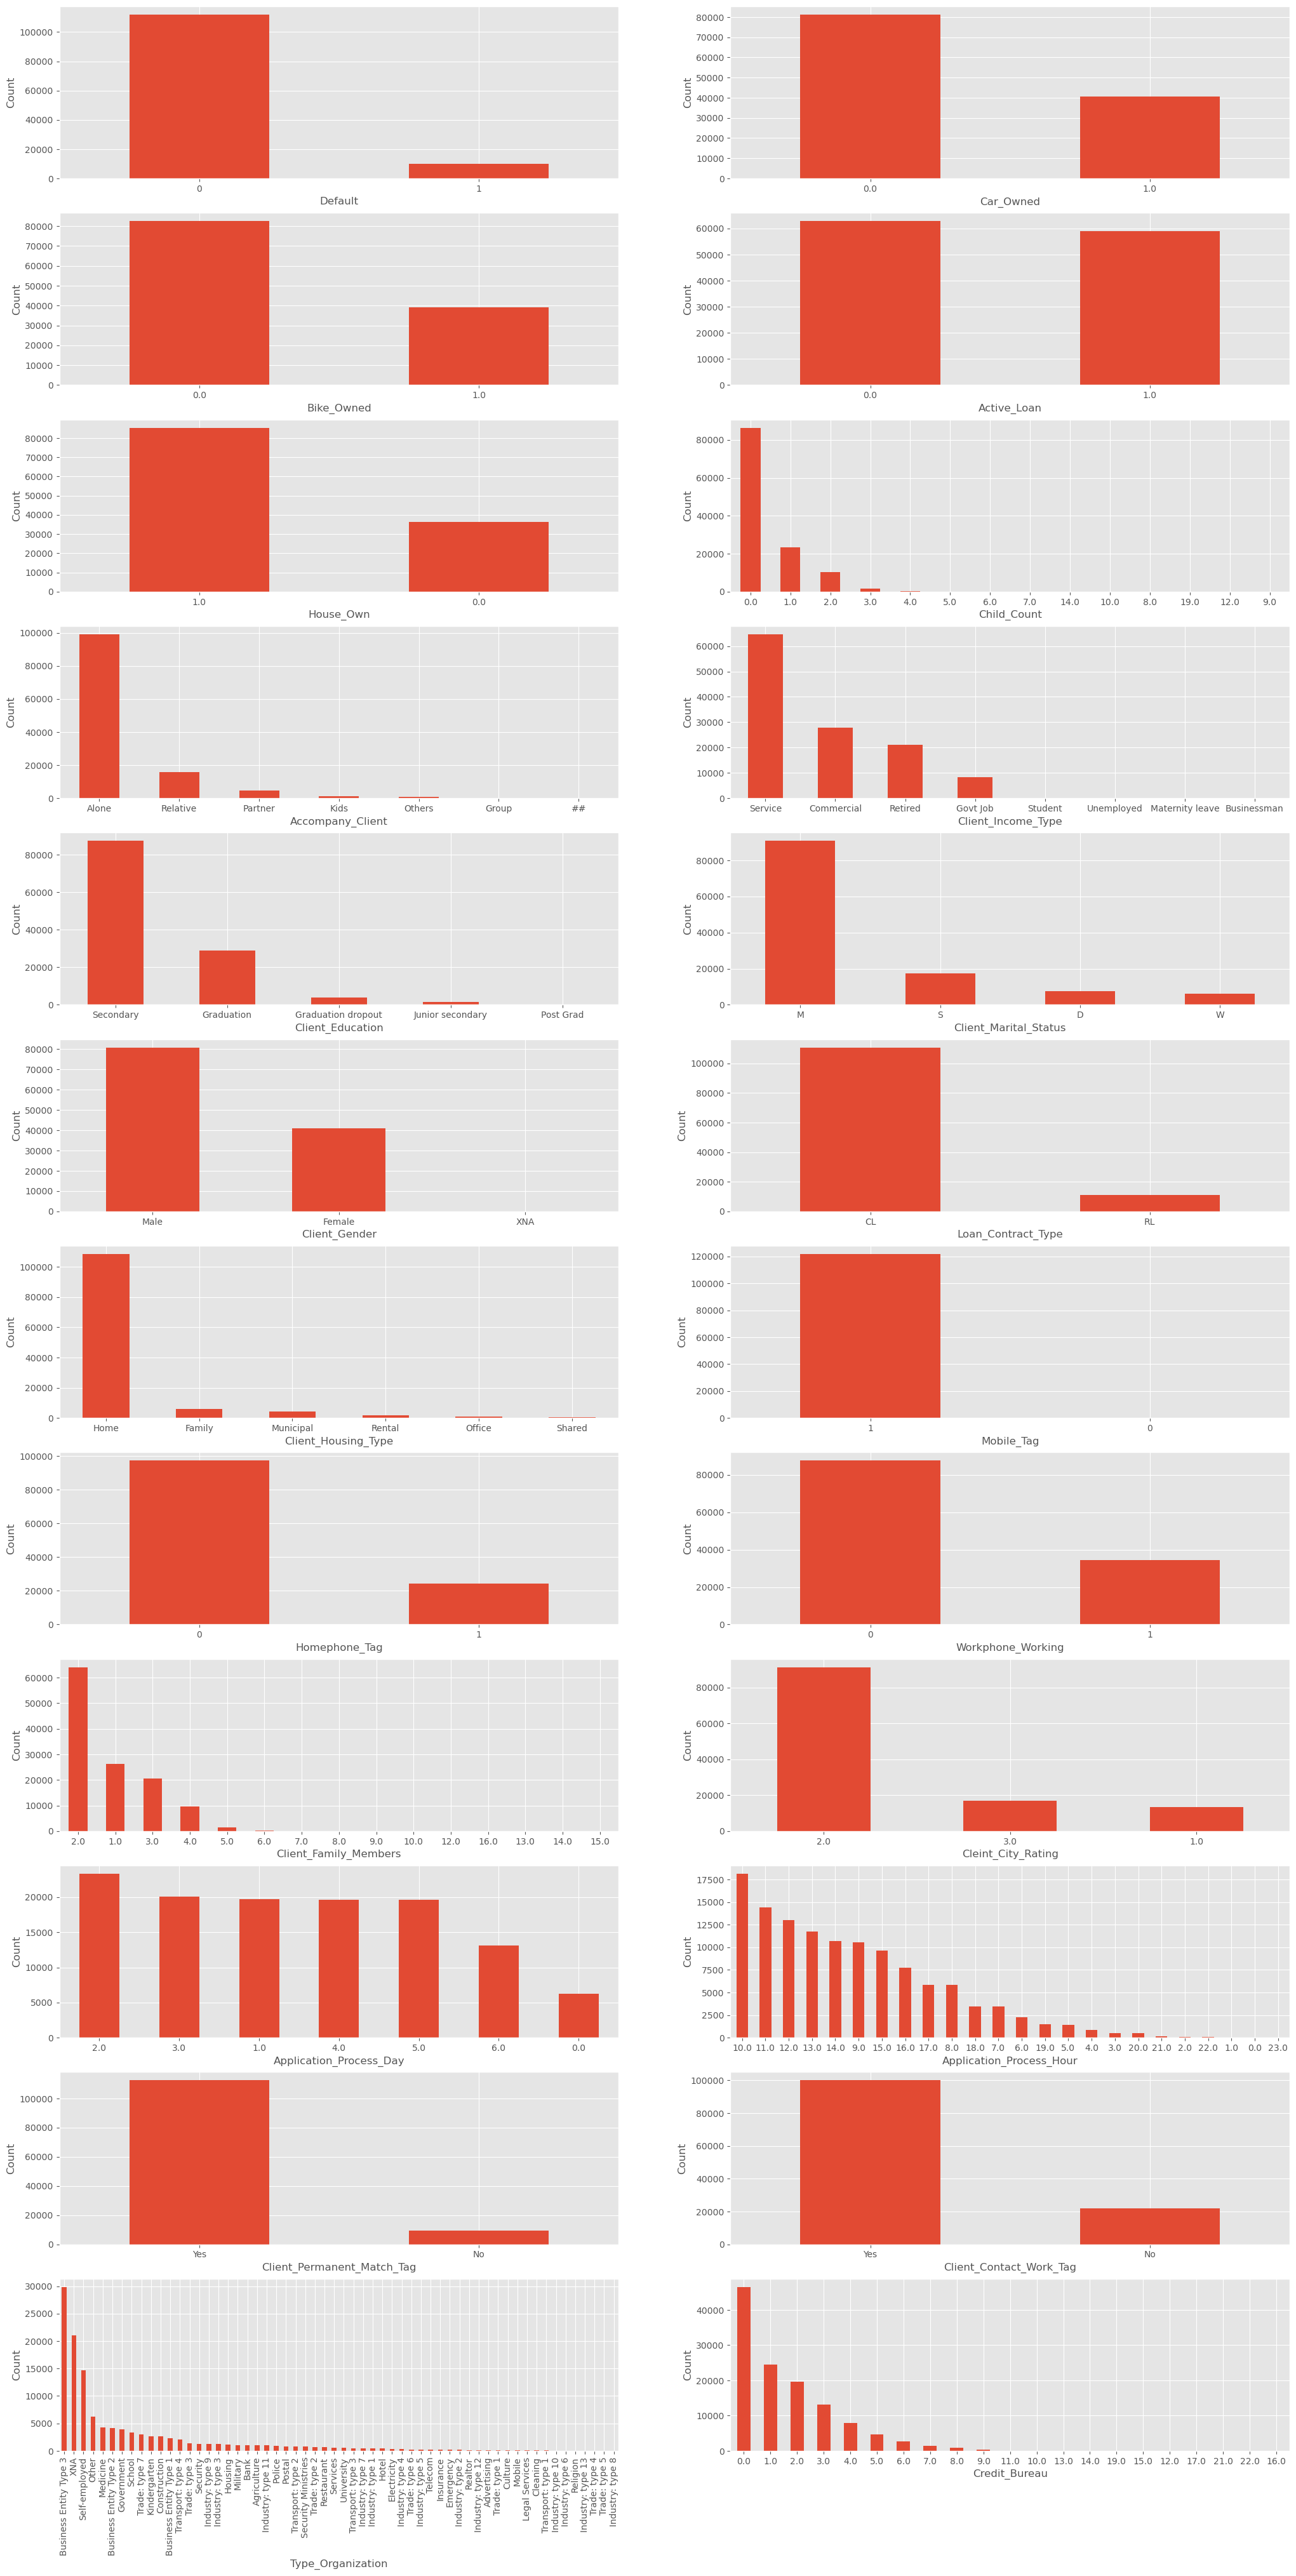

In [37]:
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(25, 50))

df['Default'].value_counts().plot.bar(ax=axes[0][0], rot=0, ylabel='Count')
df['Car_Owned'].value_counts().plot.bar(ax=axes[0][1], rot=0, ylabel='Count')
df['Bike_Owned'].value_counts().plot.bar(ax=axes[1][0], rot=0, ylabel='Count')
df['Active_Loan'].value_counts().plot.bar(ax=axes[1][1], rot=0, ylabel='Count')
df['House_Own'].value_counts().plot.bar(ax=axes[2][0], rot=0, ylabel='Count')
df['Child_Count'].value_counts().plot.bar(ax=axes[2][1], rot=0, ylabel='Count')
df['Accompany_Client'].value_counts().plot.bar(ax=axes[3][0], rot=0, ylabel='Count')
df['Client_Income_Type'].value_counts().plot.bar(ax=axes[3][1], rot=0, ylabel='Count')
df['Client_Education'].value_counts().plot.bar(ax=axes[4][0], rot=0, ylabel='Count')
df['Client_Marital_Status'].value_counts().plot.bar(ax=axes[4][1], rot=0, ylabel='Count')
df['Client_Gender'].value_counts().plot.bar(ax=axes[5][0], rot=0, ylabel='Count')
df['Loan_Contract_Type'].value_counts().plot.bar(ax=axes[5][1], rot=0, ylabel='Count')
df['Client_Housing_Type'].value_counts().plot.bar(ax=axes[6][0], rot=0, ylabel='Count')
df['Mobile_Tag'].value_counts().plot.bar(ax=axes[6][1], rot=0, ylabel='Count')
df['Homephone_Tag'].value_counts().plot.bar(ax=axes[7][0], rot=0, ylabel='Count')
df['Workphone_Working'].value_counts().plot.bar(ax=axes[7][1], rot=0, ylabel='Count')
df['Client_Family_Members'].value_counts().plot.bar(ax=axes[8][0], rot=0, ylabel='Count')
df['Cleint_City_Rating'].value_counts().plot.bar(ax=axes[8][1], rot=0, ylabel='Count')
df['Application_Process_Day'].value_counts().plot.bar(ax=axes[9][0], rot=0, ylabel='Count')
df['Application_Process_Hour'].value_counts().plot.bar(ax=axes[9][1], rot=0, ylabel='Count')
df['Client_Permanent_Match_Tag'].value_counts().plot.bar(ax=axes[10][0], rot=0, ylabel='Count')
df['Client_Contact_Work_Tag'].value_counts().plot.bar(ax=axes[10][1], rot=0, ylabel='Count')
df['Type_Organization'].value_counts().plot.bar(ax=axes[11][0], rot=90, ylabel='Count')
df['Credit_Bureau'].value_counts().plot.bar(ax=axes[11][1], rot=0, ylabel='Count')

plt.show()

Cleanup some categorical attribues

In [38]:
df.groupby('Child_Count')['Child_Count'].count()

Child_Count
0.0     86465
1.0     23430
2.0     10294
3.0      1430
4.0       167
5.0        34
6.0        12
7.0         4
8.0         2
9.0         1
10.0        3
12.0        1
14.0        4
19.0        1
Name: Child_Count, dtype: int64

In [39]:
df = df[df['Child_Count'] <= 5]

In [40]:
df.groupby('Accompany_Client')['Accompany_Client'].count()

Accompany_Client
##             12
Alone       99132
Group         104
Kids         1332
Others        987
Partner      4513
Relative    15740
Name: Accompany_Client, dtype: int64

In [41]:
df = df[df['Accompany_Client'] != '##']

In [42]:
df.groupby('Client_Gender')['Client_Gender'].count()

Client_Gender
Female    40957
Male      80848
XNA           3
Name: Client_Gender, dtype: int64

In [43]:
df = df[df['Client_Gender'] != 'XNA']

In [44]:
print("Current Size, Rows: %d, Columns: %d" % (df.shape[0], df.shape[1]))

Current Size, Rows: 121805, Columns: 35


**Bivariate Charts**

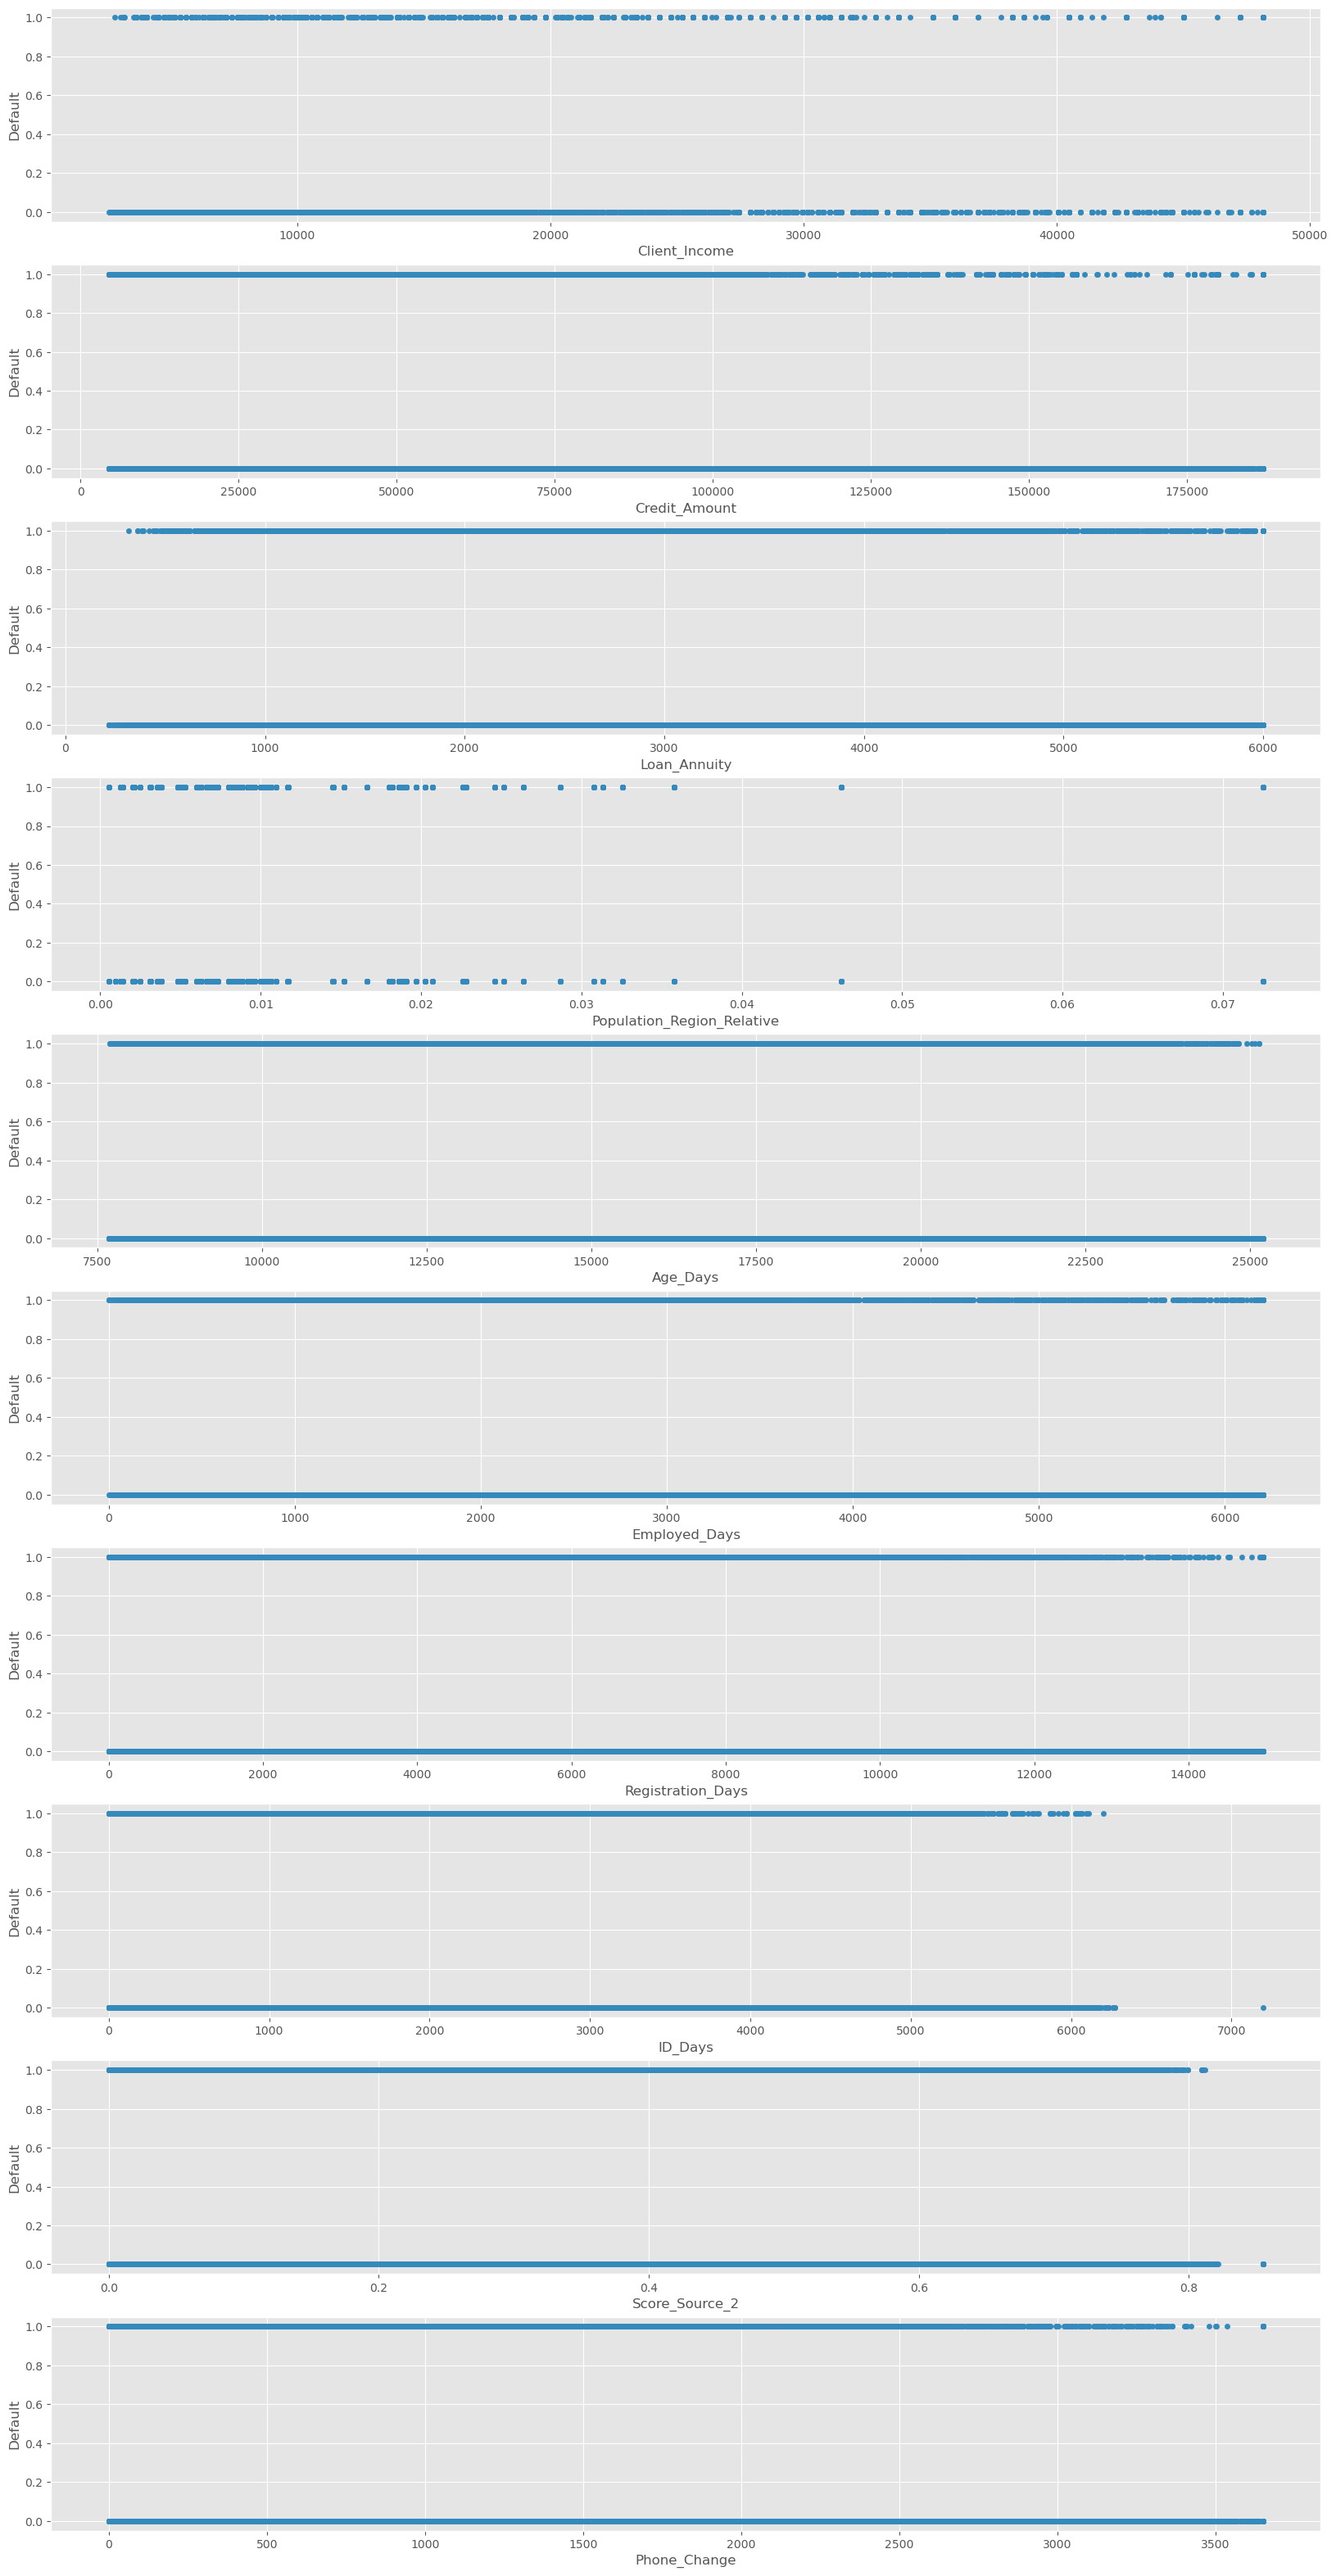

In [45]:
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(20, 40))

df.plot.scatter(x='Client_Income', y='Default', ax=axes[0])
df.plot.scatter(x='Credit_Amount', y='Default', ax=axes[1])
df.plot.scatter(x='Loan_Annuity', y='Default', ax=axes[2])
df.plot.scatter(x='Population_Region_Relative', y='Default', ax=axes[3])
df.plot.scatter(x='Age_Days', y='Default', ax=axes[4])
df.plot.scatter(x='Employed_Days', y='Default', ax=axes[5])
df.plot.scatter(x='Registration_Days', y='Default', ax=axes[6])
df.plot.scatter(x='ID_Days', y='Default', ax=axes[7])
df.plot.scatter(x='Score_Source_2', y='Default', ax=axes[8])
df.plot.scatter(x='Phone_Change', y='Default', ax=axes[9])

plt.show()

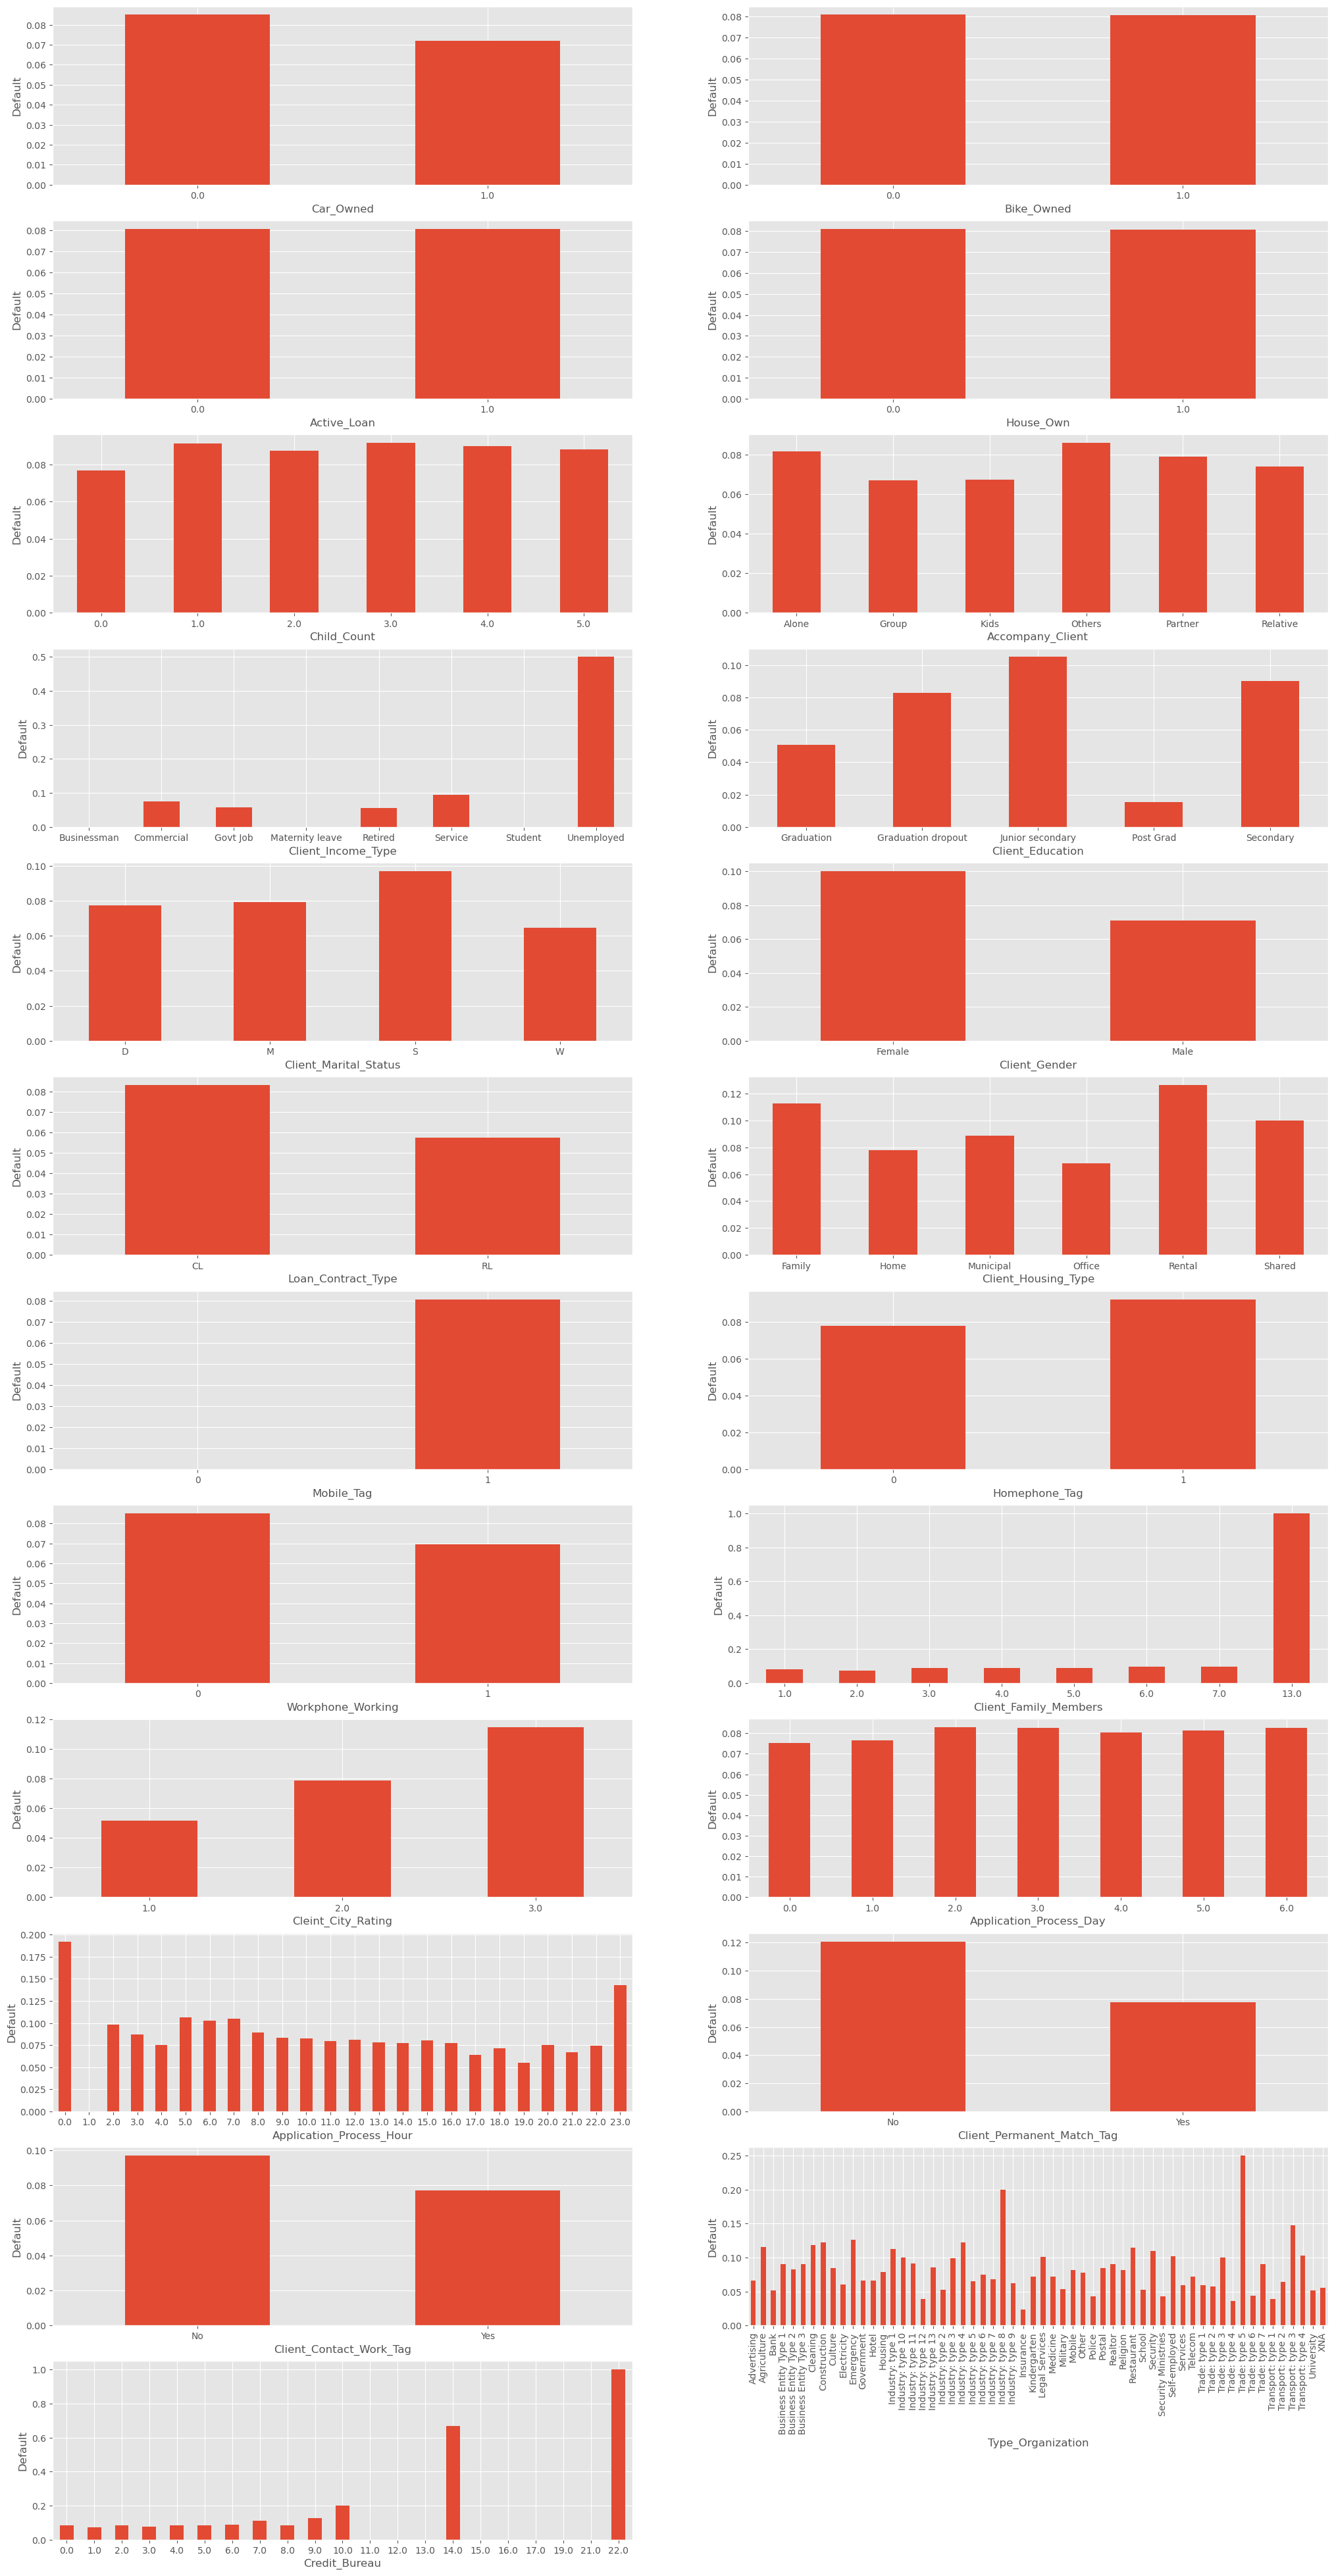

In [46]:
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(25, 50))

df.groupby('Car_Owned')['Default'].mean().plot(kind='bar', ax=axes[0][0], rot=0, ylabel='Default')
df.groupby('Bike_Owned')['Default'].mean().plot(kind='bar', ax=axes[0][1], rot=0, ylabel='Default')
df.groupby('Active_Loan')['Default'].mean().plot(kind='bar', ax=axes[1][0], rot=0, ylabel='Default')
df.groupby('House_Own')['Default'].mean().plot(kind='bar', ax=axes[1][1], rot=0, ylabel='Default')
df.groupby('Child_Count')['Default'].mean().plot(kind='bar', ax=axes[2][0], rot=0, ylabel='Default')
df.groupby('Accompany_Client')['Default'].mean().plot(kind='bar', ax=axes[2][1], rot=0, ylabel='Default')
df.groupby('Client_Income_Type')['Default'].mean().plot(kind='bar', ax=axes[3][0], rot=0, ylabel='Default')
df.groupby('Client_Education')['Default'].mean().plot(kind='bar', ax=axes[3][1], rot=0, ylabel='Default')
df.groupby('Client_Marital_Status')['Default'].mean().plot(kind='bar', ax=axes[4][0], rot=0, ylabel='Default')
df.groupby('Client_Gender')['Default'].mean().plot(kind='bar', ax=axes[4][1], rot=0, ylabel='Default')
df.groupby('Loan_Contract_Type')['Default'].mean().plot(kind='bar', ax=axes[5][0], rot=0, ylabel='Default')
df.groupby('Client_Housing_Type')['Default'].mean().plot(kind='bar', ax=axes[5][1], rot=0, ylabel='Default')
df.groupby('Mobile_Tag')['Default'].mean().plot(kind='bar', ax=axes[6][0], rot=0, ylabel='Default')
df.groupby('Homephone_Tag')['Default'].mean().plot(kind='bar', ax=axes[6][1], rot=0, ylabel='Default')
df.groupby('Workphone_Working')['Default'].mean().plot(kind='bar', ax=axes[7][0], rot=0, ylabel='Default')
df.groupby('Client_Family_Members')['Default'].mean().plot(kind='bar', ax=axes[7][1], rot=0, ylabel='Default')
df.groupby('Cleint_City_Rating')['Default'].mean().plot(kind='bar', ax=axes[8][0], rot=0, ylabel='Default')
df.groupby('Application_Process_Day')['Default'].mean().plot(kind='bar', ax=axes[8][1], rot=0, ylabel='Default')
df.groupby('Application_Process_Hour')['Default'].mean().plot(kind='bar', ax=axes[9][0], rot=0, ylabel='Default')
df.groupby('Client_Permanent_Match_Tag')['Default'].mean().plot(kind='bar', ax=axes[9][1], rot=0, ylabel='Default')
df.groupby('Client_Contact_Work_Tag')['Default'].mean().plot(kind='bar', ax=axes[10][0], rot=0, ylabel='Default')
df.groupby('Type_Organization')['Default'].mean().plot(kind='bar', ax=axes[10][1], rot=90, ylabel='Default')
df.groupby('Credit_Bureau')['Default'].mean().plot(kind='bar', ax=axes[11][0], rot=0, ylabel='Default')

axes[11][1].remove()
plt.show()

**Correlation**

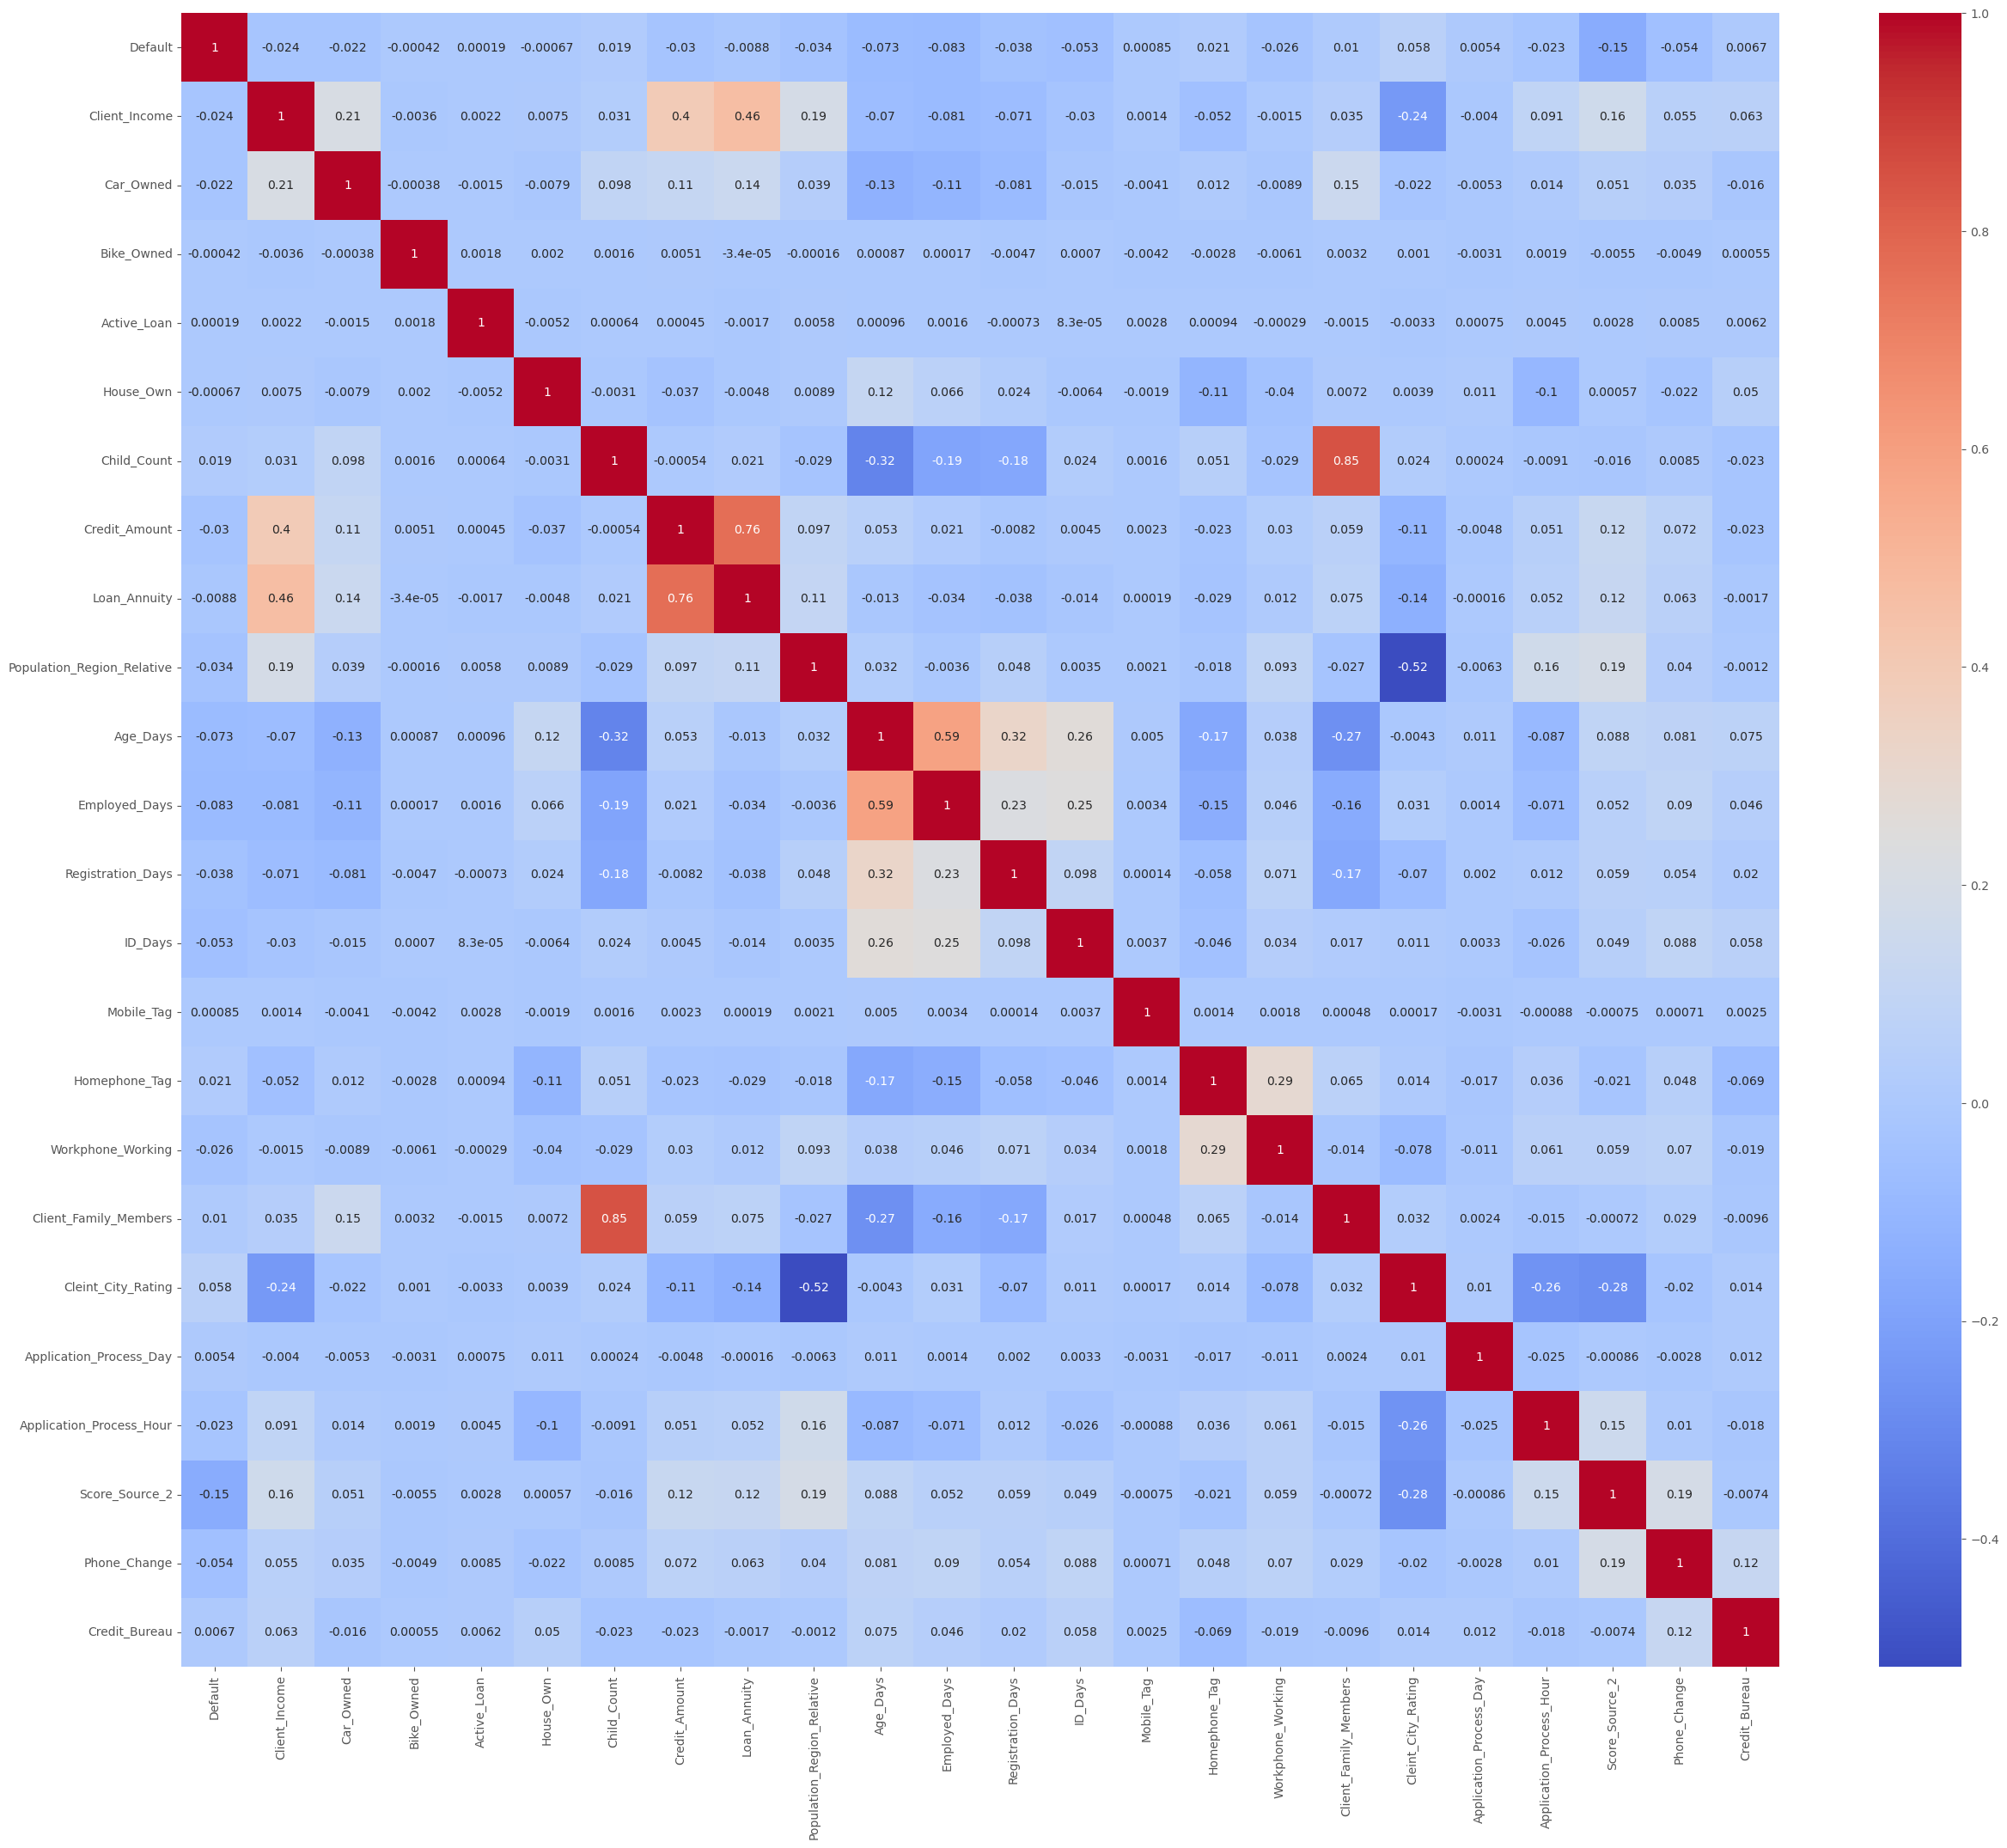

In [47]:
corr_matrix = df[['Default', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
                  'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
                  'Population_Region_Relative', 'Age_Days', 'Employed_Days', 
                  'Registration_Days', 'ID_Days', 'Mobile_Tag', 'Homephone_Tag', 
                  'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating',
                  'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_2', 
                  'Phone_Change', 'Credit_Bureau']].corr()

plt.figure(figsize = (30,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Client_Family_Members x Child_Count = 0.85 -> Remove Child_Count from model.

Credit_Amount x Loan_Annuity = 0.76 -> Remove Loan_Annuity from model.

**Variable transformation**

Preserve the categorical variables in a separate file before one hot encoding. 

Also keep 'ID' here.

And keep the highly correlated attributes in this file: 'Child_Count', 'Loan_Annuity'.

In [48]:
df_preserve = df[['ID', 'Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
             'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Client_Permanent_Match_Tag', 
             'Client_Contact_Work_Tag', 'Type_Organization',
             'Child_Count', 'Loan_Annuity'
             ]]

In [49]:
df = pd.get_dummies(df, columns=['Accompany_Client'], dtype=int)
df = pd.get_dummies(df, columns=['Client_Income_Type'], dtype=int)
df = pd.get_dummies(df, columns=['Client_Education'], dtype=int)
df = pd.get_dummies(df, columns=['Client_Marital_Status'], dtype=int)
df = pd.get_dummies(df, columns=['Client_Gender'], dtype=int)
df = pd.get_dummies(df, columns=['Loan_Contract_Type'], dtype=int)
df = pd.get_dummies(df, columns=['Client_Housing_Type'], dtype=int)
df = pd.get_dummies(df, columns=['Client_Permanent_Match_Tag'], dtype=int)
df = pd.get_dummies(df, columns=['Client_Contact_Work_Tag'], dtype=int)
df = pd.get_dummies(df, columns=['Type_Organization'], dtype=int)

In [50]:
df = df.drop(['ID', 'Child_Count', 'Loan_Annuity'], axis = 1)

In [93]:
print("Current Data Size, Rows: %d, Columns: %d" % (df.shape[0], df.shape[1]))

Current Data Size, Rows: 121805, Columns: 128


**Standardize**

In [51]:
#Separate target label
y = df['Default']

#Drop target label
X = df.drop(['Default'], axis = 1)

In [52]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler to the data
standardized_data = scaler.fit_transform(X)

# Convert the standardized data to a DataFrame for better visualization
standardized_df = pd.DataFrame(data=standardized_data)

In [53]:
standardized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,-1.188621,-0.706262,-0.689742,1.031962,-1.532211,0.042613,0.575147,-0.479352,-0.829658,0.338243,...,-0.015163,-0.009926,-0.04526,-0.158309,-0.025151,-0.081871,-0.064266,-0.131614,-0.0679,-0.457448
1,0.448771,1.415905,-0.689742,1.031962,0.652652,-1.142353,-0.896514,-0.431695,0.560122,0.834133,...,-0.015163,-0.009926,-0.04526,-0.158309,-0.025151,-0.081871,-0.064266,-0.131614,-0.0679,-0.457448
2,0.175872,-0.706262,-0.689742,1.031962,-1.532211,-0.000316,0.145619,0.179246,1.001027,-0.134447,...,-0.015163,-0.009926,-0.04526,-0.158309,-0.025151,-0.081871,-0.064266,-0.131614,-0.0679,-0.457448
3,-0.097026,-0.706262,-0.689742,1.031962,0.652652,-0.146330,-0.751385,1.668239,1.500841,-0.134447,...,-0.015163,-0.009926,-0.04526,-0.158309,-0.025151,-0.081871,-0.064266,-0.131614,-0.0679,2.186041
4,2.086163,1.415905,-0.689742,1.031962,-1.532211,1.921631,-0.007276,-1.081691,0.038105,0.162217,...,-0.015163,-0.009926,-0.04526,-0.158309,-0.025151,-0.081871,-0.064266,-0.131614,-0.0679,-0.457448


In [54]:
#split in 70% train and 30% test set
train_x, test_x, train_y, test_y= train_test_split(standardized_df, y, test_size = 0.3, random_state= 1)

In [55]:
train_y2 = list(train_y)

In [56]:
print("Current Data Size, Rows: %d, Columns: %d" % (df.shape[0], df.shape[1]))

print("Train Size, Rows: %d, Columns: %d" % (train_x.shape[0], train_x.shape[1]))
print("TEST size, Rows: %d, Columns: %d" % (test_x.shape[0], test_x.shape[1]))

Current Data Size, Rows: 121805, Columns: 117
Train Size, Rows: 85263, Columns: 116
TEST size, Rows: 36542, Columns: 116


**Logistic Regression**

Using statsmodels package

In [57]:
Xc = sm.add_constant(train_x)
model = sm.Logit(train_y2, Xc).fit()
predictions = model.predict(Xc)
print(model.summary())

c:\Users\nares\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: inf
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                85263
Model:                          Logit   Df Residuals:                    85155
Method:                           MLE   Df Model:                          107
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                    -inf
Time:                        06:03:38   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                       -24002.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.278e+07    1.8e+05     70.969      0.000    1.24e+07    1.31e+07
0              0.0209      0.016      1.276      0.202      -0.011    

c:\Users\nares\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
c:\Users\nares\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\nares\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [58]:
# Convert predictions to binary classes
#predictions_binary = (predictions > 0.5).astype(int)

# Generate confusion matrix
#conf_matrix = pd.crosstab(train_y2, predictions_binary, rownames=['Actual'], colnames=['Predicted'])
#print(conf_matrix)

Using sklearn package

In [59]:
model = LogisticRegression()
model.fit(train_x, train_y)
y_pred = model.predict(train_x)

In [60]:
#print(model.coef_)
#print(model.intercept_) 
#r2 = r2_score(train_y, y_pred)
#print("R-squared:", r2)

In [61]:
#model.score(train_x[x_list], train_y)

accuracy = accuracy_score(train_y, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(train_y, y_pred)
print("Precision:", precision)

Accuracy: 0.9189214547928175
Precision: 0.8333333333333334


In [62]:
report = classification_report(train_y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     78346
           1       0.83      0.00      0.00      6917

    accuracy                           0.92     85263
   macro avg       0.88      0.50      0.48     85263
weighted avg       0.91      0.92      0.88     85263



In [63]:
#skip this
'''
fpr, tpr, thresholds = roc_curve(train_y, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
'''

'\nfpr, tpr, thresholds = roc_curve(train_y, y_pred)\nroc_auc = auc(fpr, tpr)\n\nplt.plot(fpr, tpr, label=\'ROC curve (area = %0.2f)\' % roc_auc)\nplt.plot([0, 1], [0, 1], \'k--\')\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'ROC Curve\')\nplt.legend(loc="lower right")\nplt.show()\n'

TEST performance:

In [64]:
y_pred_test = model.predict(test_x)

accuracy = accuracy_score(test_y, y_pred_test)
print("Accuracy:", accuracy)

precision = precision_score(test_y, y_pred_test)
print("Precision:", precision)

report = classification_report(test_y, y_pred_test)
print(report)

Accuracy: 0.9202561436155656
Precision: 1.0
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33624
           1       1.00      0.00      0.00      2918

    accuracy                           0.92     36542
   macro avg       0.96      0.50      0.48     36542
weighted avg       0.93      0.92      0.88     36542



**Naive Bayes**

Make a copy of data for Bayes

In [65]:
dfb = df

In [66]:
dfb['Client_Income_group'] = pd.qcut(dfb['Client_Income'], q=4, labels=False)
dfb['Credit_Amount_group'] = pd.qcut(dfb['Credit_Amount'], q=4, labels=False)
#dfb['Loan_Annuity_group'] = pd.qcut(dfb['Loan_Annuity'], q=4, labels=False)
dfb['Population_Region_Relative_group'] = pd.qcut(dfb['Population_Region_Relative'], q=4, labels=False)
dfb['Age_Days_group'] = pd.qcut(dfb['Age_Days'], q=4, labels=False)
dfb['Employed_Days_group'] = pd.qcut(dfb['Employed_Days'], q=4, labels=False)
dfb['Registration_Days_group'] = pd.qcut(dfb['Registration_Days'], q=4, labels=False)
dfb['ID_Days_group'] = pd.qcut(dfb['ID_Days'], q=4, labels=False)
dfb['Application_Process_Day_group'] = pd.qcut(dfb['Application_Process_Day'], q=4, labels=False)
dfb['Application_Process_Hour_group'] = pd.qcut(dfb['Application_Process_Hour'], q=4, labels=False)
dfb['Score_Source_2_group'] = pd.qcut(dfb['Score_Source_2'], q=4, labels=False)
dfb['Phone_Change_group'] = pd.qcut(dfb['Phone_Change'], q=4, labels=False)

In [67]:
dfb = dfb.drop(['Client_Income', 'Credit_Amount', 'Population_Region_Relative', 'Age_Days',
                'Employed_Days', 'Registration_Days', 'ID_Days', 'Application_Process_Day',
                'Application_Process_Hour', 'Score_Source_2', 'Phone_Change'], axis = 1)

In [68]:
#split in 70% train and 30% test set
train_df, test_df = train_test_split(dfb, test_size = 0.3, random_state= 1)

#Drop target label
train_x = train_df.drop(['Default'], axis = 1)
test_x = test_df.drop(['Default'], axis = 1)

#Separate target label
train_y = train_df['Default']
test_y = test_df['Default']

In [69]:
model = MultinomialNB()
#model = GaussianNB()
model.fit(train_x, train_y)

print("TRAIN accuracy: ", model.score(train_x,train_y))
print("TEST accuracy: ", model.score(test_x,test_y))

TRAIN accuracy:  0.9173967606112851
TEST accuracy:  0.9182858081112145


In [70]:
y_pred_train = model.predict(train_x)
y_pred_test = model.predict(test_x)

precision_train = precision_score(train_y, y_pred_train)
precision_test = precision_score(test_y, y_pred_test)

print("TRAIN Precision:", precision_train)
print("TEST Precision:", precision_test)

TRAIN Precision: 0.24390243902439024
TEST Precision: 0.23846153846153847


In [71]:
#Metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

accuray = accuracy_score(y_pred_test, test_y)
f1 = f1_score(y_pred_test, test_y, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.9182858081112145
F1 Score: 0.9540312753983929


[[33525    99]
 [ 2887    31]]


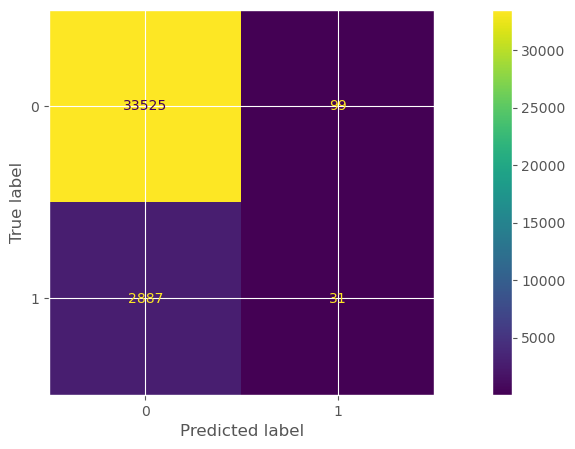

In [72]:
#Confusion matrix
labels = [0,1]
cm = confusion_matrix(test_y, y_pred_test, labels=labels)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

**Decision Tree**

In [73]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)

y_pred_train = decision_tree.predict(train_x)
y_pred_test = decision_tree.predict(test_x)

In [74]:
train_acc = decision_tree.score(train_x,train_y)
test_acc = decision_tree.score(test_x,test_y)

print("TRAIN accuracy:", train_acc )
print("TEST accuracy (model score):",test_acc )

train_precision = precision_score(train_y, y_pred_train)
test_precision = precision_score(test_y, y_pred_test)

print("TRAIN Precision:", train_precision)
print("TEST Precision:", test_precision)

TRAIN accuracy: 1.0
TEST accuracy (model score): 0.8603798369000055
TRAIN Precision: 1.0
TEST Precision: 0.20082191780821917


### **Stage 1 (Benchmark - Presented in class)**

Use the data that we set aside for benchmark analysis: df_bench

In [75]:
print("Original Data Size, Rows: %d, Columns: %d" % (df_bench.shape[0], df_bench.shape[1]))

Original Data Size, Rows: 121856, Columns: 35


**Proportions**

In [76]:
total_obs = df_bench.shape[0]
prop_cnt = df_bench.groupby('Default').Default.count()
prop_pct = df_bench.groupby('Default').Default.count()*100/total_obs
print("Target Count:", prop_cnt)
print()
print("Target Percentage:", prop_pct)
del total_obs, prop_cnt, prop_pct

Target Count: Default
0    112011
1      9845
Name: Default, dtype: int64

Target Percentage: Default
0    91.920792
1     8.079208
Name: Default, dtype: float64


**Benchmark Model** 

Logistic Regression

In [77]:
# Remove rows with any null values
df_bench2 = df_bench.dropna()

In [78]:
print("Current Benchmark Data Size, Rows: %d, Columns: %d" % (df_bench2.shape[0], df_bench2.shape[1]))

Current Benchmark Data Size, Rows: 52531, Columns: 35


In [79]:
df_bench2 = pd.get_dummies(df_bench2, columns=['Accompany_Client'], dtype=int)
df_bench2 = pd.get_dummies(df_bench2, columns=['Client_Income_Type'], dtype=int)
df_bench2 = pd.get_dummies(df_bench2, columns=['Client_Education'], dtype=int)
df_bench2 = pd.get_dummies(df_bench2, columns=['Client_Marital_Status'], dtype=int)
df_bench2 = pd.get_dummies(df_bench2, columns=['Client_Gender'], dtype=int)
df_bench2 = pd.get_dummies(df_bench2, columns=['Loan_Contract_Type'], dtype=int)
df_bench2 = pd.get_dummies(df_bench2, columns=['Client_Housing_Type'], dtype=int)
df_bench2 = pd.get_dummies(df_bench2, columns=['Client_Permanent_Match_Tag'], dtype=int)
df_bench2 = pd.get_dummies(df_bench2, columns=['Client_Contact_Work_Tag'], dtype=int)
df_bench2 = pd.get_dummies(df_bench2, columns=['Type_Organization'], dtype=int)

In [80]:
df_bench2 = df_bench2.drop(['ID'], axis = 1)

In [81]:
#Separate target label
y = df_bench2['Default']

#Drop target label
X = df_bench2.drop(['Default'], axis = 1)

In [82]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler to the data
standardized_data = scaler.fit_transform(X)

# Convert the standardized data to a DataFrame for better visualization
standardized_df = pd.DataFrame(data=standardized_data)

In [83]:
standardized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,-0.667824,-0.735217,1.413931,1.005976,0.671276,0.791228,-1.192427,-1.571446,-0.117026,-0.517550,...,-0.01309,-0.010688,-0.043453,-0.160111,-0.025821,-0.086374,-0.065587,-0.135201,-0.068593,-0.465964
1,-0.125779,1.360143,1.413931,-0.994059,0.671276,-0.576774,1.758561,0.846659,-0.300625,1.206286,...,-0.01309,-0.010688,-0.043453,-0.160111,-0.025821,-0.086374,-0.065587,-0.135201,-0.068593,2.146089
2,-0.396801,-0.735217,-0.707248,1.005976,0.671276,-0.576774,0.004122,0.319243,-0.849209,1.477300,...,-0.01309,-0.010688,-0.043453,-0.160111,-0.025821,-0.086374,-0.065587,-0.135201,-0.068593,2.146089
3,1.229336,-0.735217,-0.707248,1.005976,0.671276,0.791228,0.185793,0.533691,-1.421471,-0.300970,...,-0.01309,-0.010688,-0.043453,-0.160111,-0.025821,-0.086374,-0.065587,-0.135201,-0.068593,-0.465964
4,-0.125779,-0.735217,-0.707248,-0.994059,-1.489700,0.791228,2.300352,1.324988,0.001881,-1.111233,...,-0.01309,-0.010688,-0.043453,-0.160111,-0.025821,-0.086374,-0.065587,-0.135201,-0.068593,-0.465964


In [84]:
#split in 70% train and 30% test set
train_x, test_x, train_y, test_y= train_test_split(standardized_df, y, test_size = 0.3, random_state= 10)

In [85]:
print("Current Benchmark Data Size, Rows: %d, Columns: %d" % (df_bench2.shape[0], df_bench2.shape[1]))

print("Train Size, Rows: %d, Columns: %d" % (train_x.shape[0], train_x.shape[1]))
print("TEST size, Rows: %d, Columns: %d" % (test_x.shape[0], test_x.shape[1]))

Current Benchmark Data Size, Rows: 52531, Columns: 118
Train Size, Rows: 36771, Columns: 117
TEST size, Rows: 15760, Columns: 117


In [86]:
print("TRAIN")
print(train_y.value_counts())

print("TEST")
print(test_y.value_counts())

TRAIN
Default
0    33896
1     2875
Name: count, dtype: int64
TEST
Default
0    14573
1     1187
Name: count, dtype: int64


In [87]:
model = LogisticRegression()
model.fit(train_x, train_y)
y_pred = model.predict(train_x)

In [88]:
#model.score(train_x[x_list], train_y)

accuracy = accuracy_score(train_y, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(train_y, y_pred)
print("Precision:", precision)

Accuracy: 0.9218405808925512
Precision: 0.5555555555555556


In [89]:
report = classification_report(train_y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33896
           1       0.56      0.00      0.00      2875

    accuracy                           0.92     36771
   macro avg       0.74      0.50      0.48     36771
weighted avg       0.89      0.92      0.88     36771



TEST performace

In [90]:
y_pred_test = model.predict(test_x)

accuracy = accuracy_score(test_y, y_pred_test)
print("Accuracy:", accuracy)

precision = precision_score(test_y, y_pred_test)
print("Precision:", precision)

report = classification_report(test_y, y_pred_test)
print(report)

Accuracy: 0.9246827411167513
Precision: 0.5
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14573
           1       0.50      0.00      0.00      1187

    accuracy                           0.92     15760
   macro avg       0.71      0.50      0.48     15760
weighted avg       0.89      0.92      0.89     15760



### **Stage 3 (Improvements based on Prof. feedback)**

**SMOTE**

In [134]:
print("Current Data Size, Rows: %d, Columns: %d" % (df.shape[0], df.shape[1]))

Current Data Size, Rows: 121805, Columns: 128


In [135]:
#Separate target label
y = df['Default']

#Drop target label
X = df.drop(['Default'], axis = 1)

In [136]:
column_list = X.columns.tolist()
print(column_list)

['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Credit_Amount', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_2', 'Phone_Change', 'Credit_Bureau', 'Accompany_Client_Alone', 'Accompany_Client_Group', 'Accompany_Client_Kids', 'Accompany_Client_Others', 'Accompany_Client_Partner', 'Accompany_Client_Relative', 'Client_Income_Type_Businessman', 'Client_Income_Type_Commercial', 'Client_Income_Type_Govt Job', 'Client_Income_Type_Maternity leave', 'Client_Income_Type_Retired', 'Client_Income_Type_Service', 'Client_Income_Type_Student', 'Client_Income_Type_Unemployed', 'Client_Education_Graduation', 'Client_Education_Graduation dropout', 'Client_Education_Junior secondary', 'Client_Education_Post Grad', 'Client_Education_Secondary', 'Client_Marital_Status_D', 

In [137]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler to the data
standardized_data = scaler.fit_transform(X)

# Convert the standardized data to a DataFrame for better visualization
standardized_df = pd.DataFrame(data=standardized_data)

In [138]:
standardized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,-1.188621,-0.706262,-0.689742,1.031962,-1.532211,0.042613,0.575147,-0.479352,-0.829658,0.338243,...,0.473775,1.371324,-0.433887,-0.433554,0.460797,-1.319976,1.748365,1.436421,-0.426370,-1.327448
1,0.448771,1.415905,-0.689742,1.031962,0.652652,-1.142353,-0.896514,-0.431695,0.560122,0.834133,...,-1.328789,-1.301265,-0.433887,0.460818,1.355315,-1.319976,-0.124433,-1.104938,-1.320996,-0.433111
2,0.175872,-0.706262,-0.689742,1.031962,-1.532211,-0.000316,0.145619,0.179246,1.001027,-0.134447,...,0.473775,0.480461,0.460641,0.460818,-0.433721,-1.319976,0.811966,-1.104938,-0.426370,-1.327448
3,-0.097026,-0.706262,-0.689742,1.031962,0.652652,-0.146330,-0.751385,1.668239,1.500841,-0.134447,...,0.473775,-0.410402,1.355169,1.355190,-0.433721,-1.319976,-1.060832,1.436421,-1.320996,1.355562
4,2.086163,1.415905,-0.689742,1.031962,-1.532211,1.921631,-0.007276,-1.081691,0.038105,0.162217,...,1.375057,0.480461,-1.328415,0.460818,0.460797,0.469716,-0.124433,-1.104938,-1.320996,-0.433111


In [139]:
#split in 70% train and 30% test set
train_x, test_x, train_y, test_y= train_test_split(standardized_df, y, test_size = 0.3, random_state= 1)

In [140]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
train_x_resampled, train_y_resampled = smote.fit_resample(train_x, train_y)

In [141]:
train_y.value_counts()

Default
0    78346
1     6917
Name: count, dtype: int64

In [142]:
train_y_resampled.value_counts()

Default
0    78346
1    78346
Name: count, dtype: int64

In [143]:
train_y2 = list(train_y_resampled)

In [144]:
print("Current Data Size, Rows: %d, Columns: %d" % (df.shape[0], df.shape[1]))

print("Train Size, Rows: %d, Columns: %d" % (train_x.shape[0], train_x.shape[1]))
print("TEST size, Rows: %d, Columns: %d" % (test_x.shape[0], test_x.shape[1]))

print("Train Resampled Size, Rows: %d, Columns: %d" % (train_x_resampled.shape[0], train_x_resampled.shape[1]))

Current Data Size, Rows: 121805, Columns: 128
Train Size, Rows: 85263, Columns: 127
TEST size, Rows: 36542, Columns: 127
Train Resampled Size, Rows: 156692, Columns: 127


**Logistic Regression**

Using statsmodels package

In [145]:
Xc = sm.add_constant(train_x_resampled)
model = sm.Logit(train_y2, Xc).fit()
predictions = model.predict(Xc)
print(model.summary())

         Current function value: 0.610414
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               156692
Model:                          Logit   Df Residuals:                   156573
Method:                           MLE   Df Model:                          118
Date:                Fri, 06 Dec 2024   Pseudo R-squ.:                  0.1194
Time:                        06:18:05   Log-Likelihood:                -95647.
converged:                      False   LL-Null:                   -1.0861e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3276    103.539     -0.003      0.997    -203.259     202.604
0             -0.0632      0.013     -4.794      0.000      -0.08

c:\Users\nares\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [146]:
# Convert predictions to binary classes
#predictions_binary = (predictions > 0.5).astype(int)

# Generate confusion matrix
#conf_matrix = pd.crosstab(train_y2, predictions_binary, rownames=['Actual'], colnames=['Predicted'])
#print(conf_matrix)

Using sklearn package

In [147]:
model = LogisticRegression()
model.fit(train_x_resampled, train_y_resampled)
y_pred = model.predict(train_x_resampled)

In [148]:
#print(model.coef_)
#print(model.intercept_) 
#r2 = r2_score(train_y, y_pred)
#print("R-squared:", r2)

In [149]:
#model.score(train_x[x_list], train_y)

accuracy = accuracy_score(train_y_resampled, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(train_y_resampled, y_pred)
print("Precision:", precision)

Accuracy: 0.6641309064917162
Precision: 0.6629536699107867


In [150]:
report = classification_report(train_y_resampled, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.66      0.66     78346
           1       0.66      0.67      0.67     78346

    accuracy                           0.66    156692
   macro avg       0.66      0.66      0.66    156692
weighted avg       0.66      0.66      0.66    156692



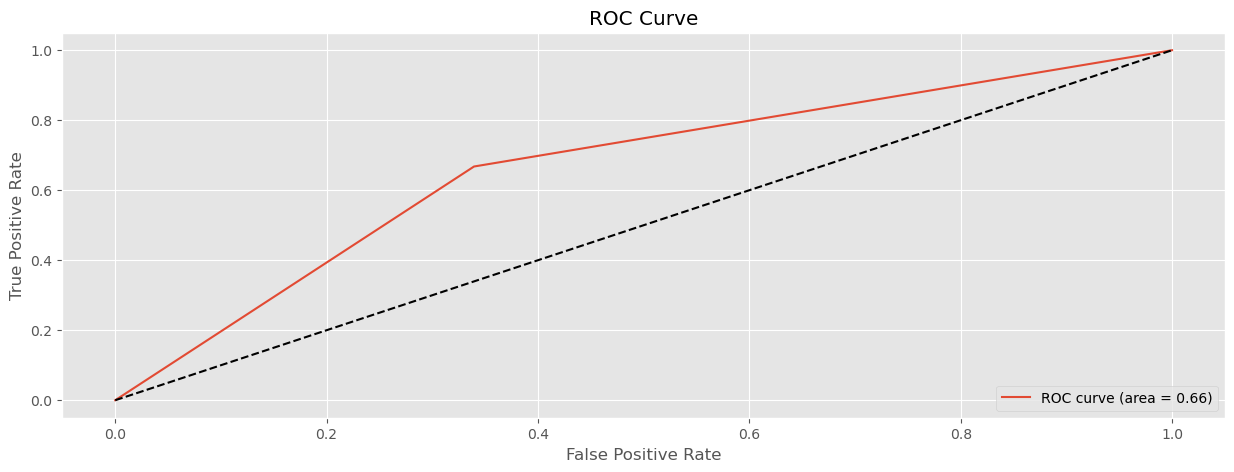

In [151]:
#skip this

fpr, tpr, thresholds = roc_curve(train_y_resampled, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


TEST performance:

In [152]:
y_pred_test = model.predict(test_x)

accuracy = accuracy_score(test_y, y_pred_test)
print("Accuracy:", accuracy)

precision = precision_score(test_y, y_pred_test)
print("Precision:", precision)

report = classification_report(test_y, y_pred_test)
print(report)

Accuracy: 0.6546166055497783
Precision: 0.1348136996612721
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     33624
           1       0.13      0.61      0.22      2918

    accuracy                           0.65     36542
   macro avg       0.54      0.64      0.50     36542
weighted avg       0.89      0.65      0.73     36542



**L1 Regularization (Lasso)**

Using statsmodels package

In [162]:
#Xc = sm.add_constant(train_x_resampled)
model = sm.Logit(train_y2, Xc)

# Fit the model with regularization
model_rgl = model.fit_regularized(method='l1', alpha=0.1)  # 'l1' for L1 regularization, 'l2' for L2

predictions = model_rgl.predict(Xc)
print(model_rgl.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6104186160944151
            Iterations: 923
            Function evaluations: 924
            Gradient evaluations: 923


c:\Users\nares\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 62 out of 128 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
c:\Users\nares\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               156692
Model:                          Logit   Df Residuals:                   156564
Method:                           MLE   Df Model:                          127
Date:                Fri, 06 Dec 2024   Pseudo R-squ.:                  0.1194
Time:                        06:30:07   Log-Likelihood:                -95647.
converged:                       True   LL-Null:                   -1.0861e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3200      0.012    -25.996      0.000      -0.344      -0.296
0             -0.0631      0.013     -4.790      0.000      -0.089      -0.037
1             -0.1687      0.007    -25.902      0.0

Using sklearn package

In [168]:
# Create a logistic regression model with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear')  

model.fit(train_x_resampled, train_y_resampled)
y_pred = model.predict(train_x_resampled)

In [169]:
#print(model.coef_)
#print(model.intercept_) 
#r2 = r2_score(train_y, y_pred)
#print("R-squared:", r2)

In [170]:
#model.score(train_x[x_list], train_y)

accuracy = accuracy_score(train_y_resampled, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(train_y_resampled, y_pred)
print("Precision:", precision)

Accuracy: 0.664098996757971
Precision: 0.6629199244737876


In [171]:
report = classification_report(train_y_resampled, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.66      0.66     78346
           1       0.66      0.67      0.67     78346

    accuracy                           0.66    156692
   macro avg       0.66      0.66      0.66    156692
weighted avg       0.66      0.66      0.66    156692



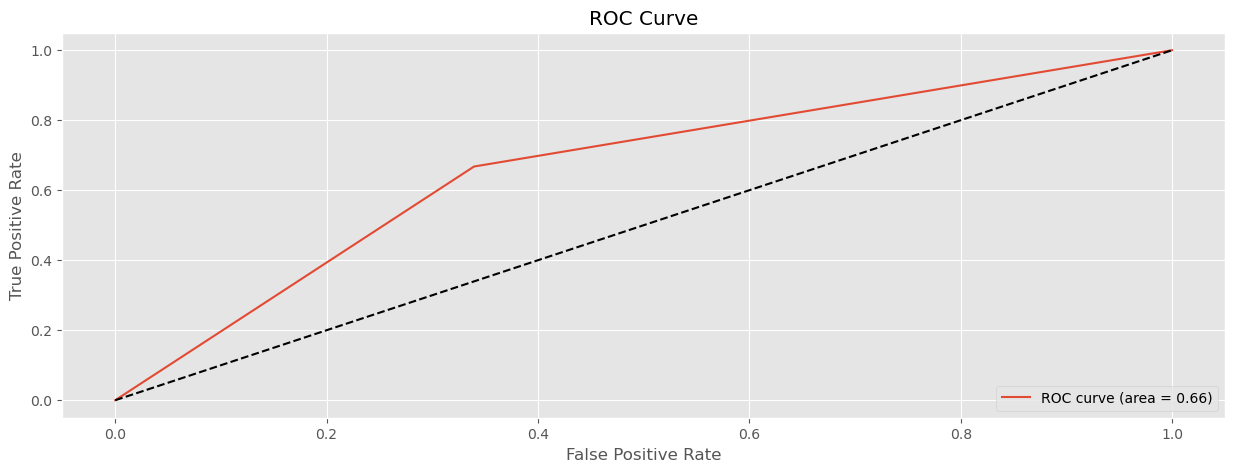

In [172]:
#skip this

fpr, tpr, thresholds = roc_curve(train_y_resampled, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


TEST performance:

In [173]:
y_pred_test = model.predict(test_x)

accuracy = accuracy_score(test_y, y_pred_test)
print("Accuracy:", accuracy)

precision = precision_score(test_y, y_pred_test)
print("Precision:", precision)

report = classification_report(test_y, y_pred_test)
print(report)

Accuracy: 0.6549997263422911
Precision: 0.1350109244330596
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     33624
           1       0.14      0.61      0.22      2918

    accuracy                           0.65     36542
   macro avg       0.54      0.64      0.50     36542
weighted avg       0.89      0.65      0.73     36542



**Naive Bayes**

Make a copy of data for Bayes

In [117]:
dfb = df

In [118]:
dfb['Client_Income_group'] = pd.qcut(dfb['Client_Income'], q=4, labels=False)
dfb['Credit_Amount_group'] = pd.qcut(dfb['Credit_Amount'], q=4, labels=False)
#dfb['Loan_Annuity_group'] = pd.qcut(dfb['Loan_Annuity'], q=4, labels=False)
dfb['Population_Region_Relative_group'] = pd.qcut(dfb['Population_Region_Relative'], q=4, labels=False)
dfb['Age_Days_group'] = pd.qcut(dfb['Age_Days'], q=4, labels=False)
dfb['Employed_Days_group'] = pd.qcut(dfb['Employed_Days'], q=4, labels=False)
dfb['Registration_Days_group'] = pd.qcut(dfb['Registration_Days'], q=4, labels=False)
dfb['ID_Days_group'] = pd.qcut(dfb['ID_Days'], q=4, labels=False)
dfb['Application_Process_Day_group'] = pd.qcut(dfb['Application_Process_Day'], q=4, labels=False)
dfb['Application_Process_Hour_group'] = pd.qcut(dfb['Application_Process_Hour'], q=4, labels=False)
dfb['Score_Source_2_group'] = pd.qcut(dfb['Score_Source_2'], q=4, labels=False)
dfb['Phone_Change_group'] = pd.qcut(dfb['Phone_Change'], q=4, labels=False)

In [119]:
dfb = dfb.drop(['Client_Income', 'Credit_Amount', 'Population_Region_Relative', 'Age_Days',
                'Employed_Days', 'Registration_Days', 'ID_Days', 'Application_Process_Day',
                'Application_Process_Hour', 'Score_Source_2', 'Phone_Change'], axis = 1)

In [120]:
#split in 70% train and 30% test set
train_df, test_df = train_test_split(dfb, test_size = 0.3, random_state= 1)

#Drop target label
train_x = train_df.drop(['Default'], axis = 1)
test_x = test_df.drop(['Default'], axis = 1)

#Separate target label
train_y = train_df['Default']
test_y = test_df['Default']

In [121]:
train_x_resampled, train_y_resampled = smote.fit_resample(train_x, train_y)

In [122]:
model = MultinomialNB()
#model = GaussianNB()
model.fit(train_x_resampled, train_y_resampled)

print("TRAIN accuracy: ", model.score(train_x_resampled,train_y_resampled))
print("TEST accuracy: ", model.score(test_x,test_y))

TRAIN accuracy:  0.7701541878334567
TEST accuracy:  0.7435827267254118


In [123]:
y_pred_train = model.predict(train_x_resampled)
y_pred_test = model.predict(test_x)

precision_train = precision_score(train_y_resampled, y_pred_train)
precision_test = precision_score(test_y, y_pred_test)

print("TRAIN Precision:", precision_train)
print("TEST Precision:", precision_test)

TRAIN Precision: 0.7712725734719249
TEST Precision: 0.1347373188405797


In [124]:
#Metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

accuray = accuracy_score(y_pred_test, test_y)
f1 = f1_score(y_pred_test, test_y, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7435827267254118
F1 Score: 0.6914151089051815


[[25982  7642]
 [ 1728  1190]]


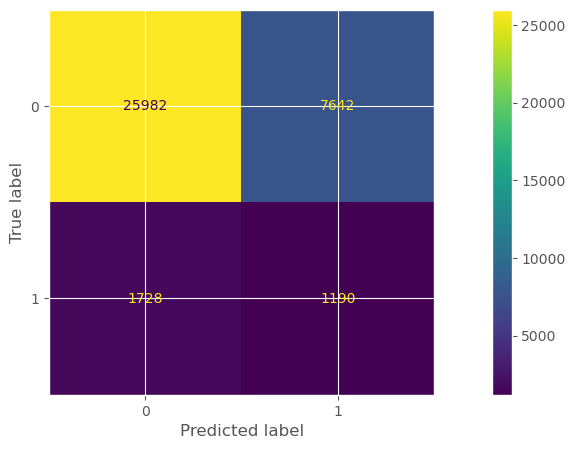

In [125]:
#Confusion matrix
labels = [0,1]
cm = confusion_matrix(test_y, y_pred_test, labels=labels)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

**Decision Tree**

In [126]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x_resampled, train_y_resampled)

y_pred_train = decision_tree.predict(train_x_resampled)
y_pred_test = decision_tree.predict(test_x)

In [127]:
train_acc = decision_tree.score(train_x_resampled,train_y_resampled)
test_acc = decision_tree.score(test_x,test_y)

print("TRAIN accuracy:", train_acc )
print("TEST accuracy (model score):",test_acc )

train_precision = precision_score(train_y_resampled, y_pred_train)
test_precision = precision_score(test_y, y_pred_test)

print("TRAIN Precision:", train_precision)
print("TEST Precision:", test_precision)

TRAIN accuracy: 1.0
TEST accuracy (model score): 0.8500629412730557
TRAIN Precision: 1.0
TEST Precision: 0.180912035883379


**The End!**